### Libraries

In [ ]:
!pip install moabb
!pip install braindecode
!pip install https://api.github.com/repos/autoreject/autoreject/zipball/master

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.0/365.0 kB 34.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyriemann: filename=pyriemann-0.3-py2.py3-none-any.whl size=78031 sha256=9ccf131c72535ab36468330e4b983d129a86bcb8ace65b8cfa063f830d9013e9
  Stored in directory: /root/.cache/pip/wheels/eb/52/63/ad042f5ca1209b213a326a843e75d730b30bc7a89a79edb187
Successfully built pyriemann
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 8.9 MB/s eta 0:00:00
     - 73.4 kB 1.8 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autoreject: filename=autoreject-0.5.dev2-py3-none-any.whl size=29846 sha256=6bd5c

In [ ]:
from numpy import nan_to_num, array, empty_like, empty, vstack, concatenate, linspace, tile
from keras.layers import GlobalAveragePooling2D,Conv1D, Permute, DepthwiseConv2D,ELU, AveragePooling2D, Conv2D, MaxPooling2D, ThresholdedReLU, UpSampling2D, SeparableConv2D, Conv2DTranspose, Lambda, Activation, Input, PReLU, Add,BatchNormalization, Multiply
from keras.layers import Dense, Dropout, Flatten,LSTM,MaxPooling1D
from scipy.signal import filtfilt, butter
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import pickle
from keras import backend as K
from keras.models import Model
import gzip
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]
from scipy.stats import pearsonr

import moabb
from moabb.datasets import Nakanishi2015, Wang2016 #Kalunga2016
from moabb.paradigms import SSVEP
moabb.set_log_level("info")

from scipy.signal import filtfilt, cheby1, cheb1ord
from scipy.linalg import eigh

from autoreject import AutoReject
from sklearn.decomposition import FastICA
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


import scipy.io
#from keras.engine import training
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.models import load_model
import tensorflow as tf
import h5py
from keras import backend as K
import os
import numpy as np
import numpy
import scipy
from keras.callbacks import Callback
from keras.models import Model
from keras.layers import Lambda
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from scipy import io
from sklearn.model_selection import KFold, StratifiedKFold
from scipy import stats, signal, integrate
import statsmodels.api as sm
from statsmodels import tsa
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Tensorflow not install, you could not use those pipelines


### Nakanishi 2015 Dataset

In [ ]:
dataset  = moabb.datasets.Nakanishi2015()
n_subject = 10

data = dataset.subject_list[:n_subject]

sessions = dataset.get_data()
dataset.paradigm


NameError: ignored

In [ ]:
import numpy as np
kernel_size = 3

ax = np.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
xx, yy = np.meshgrid(ax, ax)
xy = np.hstack((xx.reshape((kernel_size * kernel_size, 1)), yy.reshape(kernel_size * kernel_size,
                                                                           1))).reshape(kernel_size, kernel_size, 2)
xy

array([[[-1., -1.],
        [ 0., -1.],
        [ 1., -1.]],

       [[-1.,  0.],
        [ 0.,  0.],
        [ 1.,  0.]],

       [[-1.,  1.],
        [ 0.,  1.],
        [ 1.,  1.]]])

In [ ]:

dataset  = moabb.datasets.MAMEM3()
n_subject = 11

paradigm = SSVEP()

data = dataset.subject_list[8] #:n_subject

sessions = dataset.get_data()
print(dataset.paradigm)

'''

subject = 8
session_name = "session_0"
run_name = "run_0"
raw = sessions[subject][session_name][run_name]
raw
'''
sessions


/usr/local/lib/python3.10/dist-packages/moabb/datasets/download.py:54: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_MAMEM3_PATH"
  set_config(key, get_config("MNE_DATA"))


MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


ssvep


{1: {'session_0': {'run_0': <RawArray | 15 x 17792 (139.0 s), ~2.1 MB, data loaded>,
   'run_1': <RawArray | 15 x 19200 (150.0 s), ~2.2 MB, data loaded>,
   'run_2': <RawArray | 15 x 17792 (139.0 s), ~2.1 MB, data loaded>,
   'run_3': <RawArray | 15 x 19328 (151.0 s), ~2.2 MB, data loaded>,
   'run_4': <RawArray | 15 x 17664 (138.0 s), ~2.0 MB, data loaded>,
   'run_5': <RawArray | 15 x 21504 (168.0 s), ~2.5 MB, data loaded>,
   'run_6': <RawArray | 15 x 18048 (141.0 s), ~2.1 MB, data loaded>,
   'run_7': <RawArray | 15 x 19200 (150.0 s), ~2.2 MB, data loaded>,
   'run_8': <RawArray | 15 x 17664 (138.0 s), ~2.0 MB, data loaded>,
   'run_9': <RawArray | 15 x 19200 (150.0 s), ~2.2 MB, data loaded>}},
 2: {'session_0': {'run_0': <RawArray | 15 x 17792 (139.0 s), ~2.1 MB, data loaded>,
   'run_1': <RawArray | 15 x 19072 (149.0 s), ~2.2 MB, data loaded>,
   'run_2': <RawArray | 15 x 17920 (140.0 s), ~2.1 MB, data loaded>,
   'run_3': <RawArray | 15 x 19200 (150.0 s), ~2.2 MB, data loaded>,


In [ ]:
import torch
import numpy as np
fill_value = 3.14
size = (5,)
logvar = torch.full(size, fill_value)
np.sqrt(1/(3-1))

0.7071067811865476

ssvep
(9, 15361)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


(300, 8)


<RawArray | 9 x 15361 (60.0 s), ~1.1 MB, data loaded>

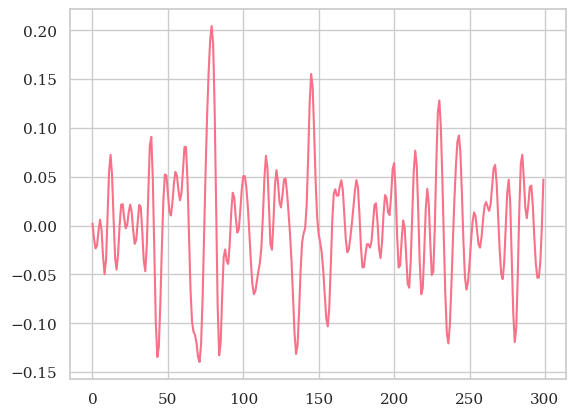

In [ ]:

subject = 8
session_name = "session_0"
run_name = "run_0"
raw = sessions[subject][session_name][run_name]
window = 300

print(dataset.paradigm)

paradigm = SSVEP()
for i in range(1,len(data)+1):
 X, _, _ = paradigm.get_data(dataset=dataset, subjects=[i])
 for k in range(int(X.shape[-1]/window)+3):
  x = X[:,:,int(k*(window)/2):int((k)*(window)/2 + window)]
  if k ==0:
    signal = x
  else:
    signal = np.concatenate((signal,x),axis = 0)
 label = np.zeros((signal.shape[0],len(data)))
 label[:,i-1]=1
 if i==1:
  F_signal = signal
  F_label = label
 else:
  F_signal = np.concatenate((F_signal,signal),axis = 0)
  F_label = np.concatenate((F_label,label),axis = 0)
F_signal = np.expand_dims(F_signal,axis = -1)
print(F_signal.shape)  #9720x8x300x1
print(F_label.shape)   #9720x9

ar = AutoReject()

a = F_signal[0,:,:,0]

a.shape

aa = Artifact_removal(a)

aaa = raw.get_data()

ica = FastICA(n_components=8)

S_ = ica.fit_transform(aa.T)
print(S_.shape)
plt.plot(S_[:,0])

raw.crop(0,60)
raw.filter(0.5, None)
raw.filter(None, 50.)
raw.notch_filter(60)
#raw.plot()
#epochs_clean = ar.fit_transform(raw)  # doctest: +SKIP

### Model

In [ ]:

#from tensorflow.keras.layers import Input, Dense

### Encoder
class Encoder(tf.keras.layers.Layer):
  def __init__(self, input_size,num_channels, num_layers = 4, d_model = 512, num_heads = 8, dff = 2048,  dropout = 0.0):
    super(Encoder, self).__init__()

    self.d_model = d_model

    self.embedding_1 =  tf.keras.layers.Conv1D(num_channels, 3, activation='relu',data_format = 'channels_first') #tf.keras.layers.Embedding(input_size, d_model, mask_zero=False)

    self.embedding_2 = tf.keras.layers.Dense(d_model)


    self.encoder_layers = [ EncoderLayer(d_model = d_model, num_heads = num_heads, dff = dff, dropout = dropout) for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(dropout)

  def call(self, inputs, mask=None, training=None):
    x = self.embedding_1(inputs)
    #Num_batch,Num_channel,Temp_length = x.shape
   # x = tf.reshape(x,(Num_batch*Num_channel,Temp_length))
    x = self.embedding_2(x)

    #Encoder layer
    for encoder_layer in self.encoder_layers:
      x = encoder_layer(x, mask = None)
    #x = tf.reshape(x,(Num_batch,Num_channel,-1))
    return x

### Encoder layer
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,  d_model = 512, num_heads = 8, dff = 2048, dropout = 0.0):
    super(EncoderLayer, self).__init__()

    self.multi_head_attention =  MultiHeadAttention(d_model, num_heads)
    self.dropout_attention = tf.keras.layers.Dropout(dropout)
    self.add_attention = tf.keras.layers.Add()
    self.layer_norm_attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dense1 = tf.keras.layers.Dense(dff, activation='relu')
    self.dense2 = tf.keras.layers.Dense(d_model)
    self.dropout_dense = tf.keras.layers.Dropout(dropout)
    self.add_dense = tf.keras.layers.Add()
    self.layer_norm_dense = tf.keras.layers.LayerNormalization(epsilon=1e-6)

  def call(self, inputs, mask=None, training=None):
    # print(mask)
    attention = self.multi_head_attention([inputs,inputs,inputs], mask = [mask,mask])
    attention = self.dropout_attention(attention, training = training)
    x = self.add_attention([inputs , attention])
    x = self.layer_norm_attention(x)
    # x = inputs

    ## Feed Forward
    dense = self.dense1(x)
    dense = self.dense2(dense)
    dense = self.dropout_dense(dense, training = training)
    x = self.add_dense([x , dense])
    x = self.layer_norm_dense(x)

    return x

#Multi ahead attention

class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model = 512, num_heads = 8, causal=False, dropout=0.0):
    super(MultiHeadAttention, self).__init__()

    assert d_model % num_heads == 0
    depth = d_model // num_heads

    self.w_query =   tf.keras.layers.Dense(d_model)
    self.split_reshape_query = tf.keras.layers.Reshape((-1,num_heads,depth))
    self.split_permute_query = tf.keras.layers.Permute((2,1,3))

    self.w_value = tf.keras.layers.Dense(d_model)
    self.split_reshape_value = tf.keras.layers.Reshape((-1,num_heads,depth))
    self.split_permute_value = tf.keras.layers.Permute((2,1,3))

    self.w_key = tf.keras.layers.Dense(d_model)
    self.split_reshape_key = tf.keras.layers.Reshape((-1,num_heads,depth))
    self.split_permute_key = tf.keras.layers.Permute((2,1,3))

    self.attention = tf.keras.layers.Attention(causal=causal, dropout=dropout)
    self.join_permute_attention = tf.keras.layers.Permute((2,1,3))
    self.join_reshape_attention = tf.keras.layers.Reshape((-1,d_model))

    self.dense = tf.keras.layers.Dense(d_model)

  def call(self, inputs, mask=None, training=None):
    q = inputs[0]
    v = inputs[1]
    k = inputs[2] if len(inputs) > 2 else v

    query = self.w_query(q)
    query = self.split_reshape_query(query)
    query = self.split_permute_query(query)

    value = self.w_value(v)
    value = self.split_reshape_value(value)
    value = self.split_permute_value(value)

    key = self.w_key(k)
    key = self.split_reshape_key(key)
    key = self.split_permute_key(key)

    if mask is not None:
      if mask[0] is not None:
        mask[0] = tf.keras.layers.Reshape((-1,1))(mask[0])
        mask[0] = tf.keras.layers.Permute((2,1))(mask[0])
      if mask[1] is not None:
        mask[1] = tf.keras.layers.Reshape((-1,1))(mask[1])
        mask[1] = tf.keras.layers.Permute((2,1))(mask[1])

    attention = self.attention([query, value, key], mask=mask)
    attention = self.join_permute_attention(attention)
    attention = self.join_reshape_attention(attention)

    x = self.dense(attention)

    return x


### EEGNet_MOdel

In [ ]:
from tensorflow.python.ops.variables import trainable_variables
### HyperParameter
nb_classes = 54
Chans = 3
Samples = 300
dropoutRate = 0.5
kernLength = 128
F1 = 8 #8
D = 2 #2
F2 = 16 #16
norm_rate = 0.25
dropoutType = 'Dropout'


### EEGNet

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")



#Changing to Float 32
K.set_floatx('float32')
input1   =  Input(shape = (Chans, Samples, 1))

block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                input_shape = (Chans, Samples, 1),
                                use_bias = False)(input1)
block1       = BatchNormalization()(block1)
block1       = DepthwiseConv2D((Chans, 1), use_bias = False,
                                depth_multiplier = D,
                                )(block1)
block1       = BatchNormalization()(block1)
block1       = Activation('elu')(block1)
block1       = AveragePooling2D((1, 4))(block1)
block1       = Dropout(dropoutRate)(block1)

block2       = SeparableConv2D(F2, (1, 16),
                                use_bias = False, padding = 'same')(block1)
block2       = BatchNormalization()(block2)
block2       = Activation('elu')(block2)
block2       = AveragePooling2D((1, 8))(block2)
block2       = Dropout(dropoutRate)(block2)

flatten      = Flatten(name = 'flatten')(block2)

dense        = Dense(nb_classes, name = 'dense')(flatten)

softmax      = Activation('softmax', name = 'softmax')(dense)

model = Model(inputs=input1, outputs=softmax )

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipvalue=0.1),

              metrics=['mse'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 300, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 3, 300, 8)         1024      
                                                                 
 batch_normalization (Batch  (None, 3, 300, 8)         32        
 Normalization)                                                  
                                                                 
 depthwise_conv2d (Depthwis  (None, 1, 300, 16)        48        
 eConv2D)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 1, 300, 16)        64        
 chNormalization)                                                
                                                             


### CNN




In [ ]:
Chans = 9
Samples = 300
nb_classes = 54


input1   =  Input(shape = (Chans, Samples, 1))

block1       = Conv2D(32, (3, 3), padding = 'same',
                                input_shape = (Chans, Samples, 1),
                                use_bias = False)(input1)
block1 = tf.keras.activations.relu(block1)
block2       = Conv2D(32, (3, 3), padding = 'same',
                                input_shape = (Chans, Samples, 32),
                                use_bias = False)(block1)
block2 = tf.keras.activations.relu(block2)
block3 = tf.keras.layers.MaxPooling2D(
    pool_size=(2))(block2)

block4       = Conv2D(64, (3, 3), padding = 'same',
                                use_bias = False)(block3)

block4 = tf.keras.activations.relu(block4)
block5       = Conv2D(64, (3, 3), padding = 'same',
                                use_bias = False)(block4)
block5 = tf.keras.activations.relu(block5)

block6 = tf.keras.layers.MaxPooling2D(
    pool_size=(2))(block5)

block6       = Dropout(0.5)(block6)

block7      = Conv2D(128, (3, 3), padding = 'same',
                                use_bias = False)(block6)

block7 = tf.keras.activations.relu(block7)
block8       = Conv2D(128, (3, 3), padding = 'same',
                                use_bias = False)(block7)
block8 = tf.keras.activations.relu(block8)

flatten      = Flatten(name = 'flatten')(block8)

dense1       = Dense(256, name = 'dense')(flatten)

dense2        = Dense(nb_classes, name = 'dense2')(dense1)

softmax      = Activation('softmax', name = 'softmax')(dense2)

model = Model(inputs = input1,outputs = softmax )
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipvalue=0.1),

              metrics=['mse'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 9, 300, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 300, 32)        288       
                                                                 
 tf.nn.relu_6 (TFOpLambda)   (None, 9, 300, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 300, 32)        9216      
                                                                 
 tf.nn.relu_7 (TFOpLambda)   (None, 9, 300, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 150, 32)        0         
 g2D)                                                            
                                                           

### CNN + LSTM


In [ ]:
Chans = 9
Samples = 300
num_class = 54

input1   =  Input(shape = (Samples, Chans))

block1       = Conv1D(128, (2), padding = 'same',
                                input_shape = (Samples, Chans),
                                use_bias = False)(input1)
block1       = tf.keras.activations.relu(block1)

block2       = Conv1D(256, (2), padding = 'same',
                                use_bias = False)(block1)
block2       = tf.keras.activations.relu(block2)

block3       = Conv1D(512, (2), padding = 'same',
                                use_bias = False)(block2)
block3       = tf.keras.activations.relu(block3)

block4       = Conv1D(1024, (2), padding = 'same',
                                use_bias = False)(block3)
block4       = tf.keras.activations.relu(block4)

flatten      = Flatten(name = 'flatten')(block4)

dense1       = Dense(192)(flatten)

dropout      = Dropout(0.5)(dense1)

drr          = tf.expand_dims((dropout),axis = -1)

lstm1        = LSTM((192))(drr)

drr          = tf.expand_dims((lstm1 ),axis = -1)

lstm2        = LSTM((192))(drr)

dense2       = Dense(150)(lstm2)

dense3       = Dense(num_class)(dense2)

softmax      = Activation('softmax', name = 'softmax')(dense3)

model = Model(inputs = input1,outputs = softmax )

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipvalue=0.1),

              metrics=['mse'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 9)]          0         
                                                                 
 conv1d (Conv1D)             (None, 300, 128)          2304      
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 300, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 300, 256)          65536     
                                                                 
 tf.nn.relu_1 (TFOpLambda)   (None, 300, 256)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 300, 512)          262144    
                                                                 
 tf.nn.relu_2 (TFOpLambda)   (None, 300, 512)          0     

### GCN

In [ ]:
from keras.regularizers import l2
from keras import activations, initializers, constraints


def graph_conv_op(x, num_filters, graph_conv_filters, kernel):

    if len(x.get_shape()) == 2:
        conv_op = K.dot(graph_conv_filters, x)
        conv_op = tf.split(conv_op, num_filters, axis=0)
        conv_op = K.concatenate(conv_op, axis=1)
    elif len(x.get_shape()) == 3:
        conv_op = K.batch_dot(graph_conv_filters,x)
        conv_op = tf.split(conv_op, num_filters, axis=1)
        conv_op = K.concatenate(conv_op, axis=2)
    else:
        raise ValueError('x must be either 2 or 3 dimension tensor'
                         'Got input shape: ' + str(x.get_shape()))

    conv_out = K.dot(conv_op, kernel)
    return conv_out

class GraphCNN(layers.Layer):

    def __init__(self,
                 output_dim,
                 num_filters,
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        super(GraphCNN, self).__init__(**kwargs)

        self.output_dim = output_dim
        self.num_filters = num_filters
        #if num_filters != int(self.graph_conv_filters.get_shape().as_list()[-2]/self.graph_conv_filters.get_shape().as_list()[-1]):
         #   raise ValueError('num_filters does not match with graph_conv_filters dimensions.')
        #self.graph_conv_filters = graph_conv_filters

        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.kernel_initializer.__name__ = kernel_initializer
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

    def build(self, input_shape):

        self.input_dim = input_shape[-1]
        kernel_shape = (self.num_filters * self.input_dim, self.output_dim)

        self.kernel = self.add_weight(shape=kernel_shape,
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.output_dim,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None

        self.built = True

    def call(self, input,graph_conv_filters):

        self.graph_conv_filters = graph_conv_filters

        output = graph_conv_op(input, self.num_filters, self.graph_conv_filters, self.kernel)
        if self.use_bias:
            output = K.bias_add(output, self.bias)
        if self.activation is not None:
            output = self.activation(output)
        return output

    def compute_output_shape(self, input_shape):
        output_shape = (input_shape[0], self.output_dim)
        return output_shape

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'num_filters': self.num_filters,
            'graph_conv_filters': self.graph_conv_filters,
            'activation': activations.serialize(self.activation),
            'use_bias': self.use_bias,
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint)
        }
        base_config = super(GraphCNN, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

Chans = 9
Samples = 300
out1 = 32
out2 = 64
num_filters = 1
nb_classes = 54

def New_weight(original_matrix):
  # Initialize the max-pooled matrix
  max_pooled_matrix = np.empty((original_matrix.shape[0],int(original_matrix.shape[1]/2),int(original_matrix.shape[2]/2)))
  original_matrix = np.array(original_matrix)
  # Iterate through each of the 64 channels
  for i in range(original_matrix.shape[0]):
      channel_data = original_matrix[i]  # Get data for a single channel

      # Reshape the 16x16 channel data into 8x2x8x2 blocks
      reshaped_channel = channel_data.reshape(8, 2, 8, 2)

      # Compute the maximum value in each 2x2 block along both dimensions
      max_pooled_channel = np.max(reshaped_channel, axis=(1, 3))

      # Store the max-pooled channel in the max-pooled matrix
      max_pooled_matrix[i] = max_pooled_channel
  max_pooled_matrix = K.constant(max_pooled_matrix)
  return max_pooled_matrix

with open('/content/drive/MyDrive/Data/GCN_Khodam_Adj','rb') as f:
  a = pickle.load(f)

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")

graph_conv_filters1 = K.constant(a[0:64])



input1   =  Input(shape = (Chans, Samples))

input2   =  Input(shape = (Chans, Chans))

block2 = GraphCNN(out1, num_filters, activation='elu',
                       kernel_regularizer=l2(5e-4))(input1, input2)

block2 = tf.keras.layers.MaxPooling1D(2)(block2)

graph_1 = tf.expand_dims((input2),axis = -1)


weight = tf.keras.layers.MaxPooling2D(2,2)(graph_1)

weight = tf.keras.layers.Reshape(( weight.shape[1], weight.shape[2]*weight.shape[-1]))(weight)
print('w',weight.shape)
print('b',block2.shape)
block3 = GraphCNN(out2, num_filters, activation='elu',
                       kernel_regularizer=l2(5e-4))(block2,weight)

block3 = tf.keras.layers.MaxPooling1D(2,2)(block3)

flatten = Flatten()(block3)

dense1       = Dense(128, name = 'dense')(flatten)

dense1      = tf.keras.activations.relu(dense1)

dense2        = Dense(nb_classes, name = 'dense2')(dense1)

softmax      = Activation('softmax', name = 'softmax')(dense2)

model = Model(inputs = [input1,input2], outputs = softmax)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipvalue=0.1),

              metrics=['mse'])
model.summary()

w (None, 4, 4)
b (None, 4, 32)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 9, 9)]               0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 9, 300)]             0         []                            
                                                                                                  
 tf.expand_dims (TFOpLambda  (None, 9, 9, 1)              0         ['input_2[0][0]']             
 )                                                                                                
                                                                                                  
 graph_cnn (GraphCNN)        (None, 9, 32)                9632 

In [ ]:
with open('/content/drive/MyDrive/Data/GCN_Signal','rb') as f:
  a = pickle.load(f)
a.shape

(4400, 16, 300)

### DeepConvNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, Dropout, Softmax
from tensorflow.keras.models import Sequential



### Hyperparameter
epochs = 25
batch_size = 64
f = 5
fs = 1000
kf = KFold(n_splits=f,shuffle = True)
accuracies = []
window = 300
F_l = 4
F_h = 100
ica = FastICA(n_components=8)
num_trgs = 25


paradigm = SSVEP()

dataset  = moabb.datasets.Lee2019_SSVEP()
print(dataset.paradigm)

n_subject = 54

data = dataset.subject_list[:n_subject]
'''
with open('/content/drive/MyDrive/Data/Signal','rb') as f:
  x1 = pickle.load(f)
with open('/content/drive/MyDrive/Data/Signal_8','rb') as f:
  x2 = pickle.load(f)
with open('/content/drive/MyDrive/Data/Signal_43','rb') as f:
  x3= pickle.load(f)
F_signal = np.concatenate((x1,x2,x3),axis = 0)

for i in range(1,len(data)+1):
  label = np.zeros((16,len(data)))
  label[:,i-1]=1
  if i==1:
    F_label = label
  else:

    F_label = np.concatenate((F_label,label),axis = 0)

for i in range (F_signal.shape[0]):
  for j in range(F_signal.shape[1]):
    if j==0:
      A = F_signal[i,j,:,:]
    else:
      A = np.concatenate((A,F_signal[i,j,:,:]))
  A = np.expand_dims(A,axis=0)
  if i ==0:
    X_f = A
  else:
    X_f = np.concatenate((X_f,A),axis=0)


F_signal = np.squeeze(X_f)
F_signal = np.expand_dims(F_signal,axis = -1)
print(F_signal.shape)  #9720x8x300x1 ==>648x9x300x1
print(F_label.shape)   #9720x9


plt.plot(F_signal[8,2,:,0])
'''
paradigm = SSVEP()

dataset  = moabb.datasets.Lee2019_SSVEP()
print(dataset.paradigm)

n_subject = 54

data = dataset.subject_list[:n_subject]

with open('/content/drive/MyDrive/Data/signal_ica','rb') as f:
  x1 = pickle.load(f)

with open('/content/drive/MyDrive/Data/signal_ica6','rb') as f:
  x2 = pickle.load(f)

with open('/content/drive/MyDrive/Data/signal_ica12','rb') as f:
  x3= pickle.load(f)

with open('/content/drive/MyDrive/Data/signal_ica20','rb') as f:
  x4= pickle.load(f)

with open('/content/drive/MyDrive/Data/signal_ica24','rb') as f:
  x5= pickle.load(f)

with open('/content/drive/MyDrive/Data/signal_ica30','rb') as f:
  x6= pickle.load(f)

with open('/content/drive/MyDrive/Data/signal_ica35','rb') as f:
  x7= pickle.load(f)

with open('/content/drive/MyDrive/Data/signal_ica54','rb') as f:
  x8= pickle.load(f)

F_signal = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8),axis = 0)

for i in range(1,len(data)+1):
  label = np.zeros((16,len(data)))
  label[:,i-1]=1
  if i==1:
    F_label = label
  else:
    F_label = np.concatenate((F_label,label),axis = 0)


#F_signal = np.squeeze(X_f)
F_signal = np.expand_dims(F_signal,axis = -1)
print(F_signal.shape)  #9720x8x300x1 ==>648x9x300x1
print(F_label.shape)   #9720x9


plt.plot(F_signal[8,2,:,0])

def custom_first_pool_nonlin(x):
    return tf.identity(x)

def custom_later_pool_nonlin(x):
    return tf.identity(x)

def deep4net(in_chans, n_classes, input_time_length, final_conv_length,
             n_filters_time=25, n_filters_spat=25,
             filter_time_length=10, pool_time_length=3, pool_time_stride=3,
             n_filters_2=50, filter_length_2=10,
             n_filters_3=100, filter_length_3=10,
             n_filters_4=200, filter_length_4=10,
             first_nonlin=tf.nn.elu, first_pool_mode="max",
             later_nonlin=tf.nn.elu, later_pool_mode="max",
             drop_prob=0.5, double_time_convs=False, split_first_layer=True,
             batch_norm=True, batch_norm_alpha=0.1, stride_before_pool=False):

    model = Sequential()

    if stride_before_pool:
        conv_stride = pool_time_stride
        pool_stride = 1
    else:
        conv_stride = 1
        pool_stride = pool_time_stride

    pool_class_dict = {'max': MaxPooling2D, 'mean': AveragePooling2D}
    first_pool_class = pool_class_dict[first_pool_mode]
    later_pool_class = pool_class_dict[later_pool_mode]

    if split_first_layer:
        model.add(Conv2D(n_filters_time, (filter_time_length, 1), strides=(1, 1), padding='same', input_shape=(1,input_time_length,in_chans)))

        model.add(Conv2D(n_filters_spat, (1, in_chans), strides=(conv_stride, 1), padding='same'))
        n_filters_conv = n_filters_spat
    else:
        model.add(Conv2D(n_filters_time, (filter_time_length, 1), strides=(conv_stride, 1), padding='same', input_shape=(input_time_length, in_chans, 1)))
        n_filters_conv = n_filters_time

    if batch_norm:
        model.add(BatchNormalization(momentum=batch_norm_alpha))
    model.add(Activation(first_nonlin))
    model.add(first_pool_class(pool_size=(pool_time_length, 1), strides=(pool_stride, 1),padding = 'same'))
    #model.add(Activation(custom_first_pool_nonlin))

    def add_conv_pool_block(n_filters_before, n_filters, filter_length, block_nr):
        suffix = "_{:d}".format(block_nr)
        model.add(Dropout(rate=drop_prob))
        model.add(Conv2D(n_filters, (filter_length, 1), strides=(conv_stride, 1), padding='same'))
        if batch_norm:
            model.add(BatchNormalization(momentum=batch_norm_alpha))
        model.add(Activation(later_nonlin))
        model.add(later_pool_class(pool_size=(pool_time_length, 1), strides=(pool_stride, 1), padding='same'))
        #model.add(Activation(custom_later_pool_nonlin))

    add_conv_pool_block(n_filters_conv, n_filters_2, filter_length_2, 2)
    add_conv_pool_block(n_filters_2, n_filters_3, filter_length_3, 3)
    add_conv_pool_block(n_filters_3, n_filters_4, filter_length_4, 4)

    if final_conv_length == "auto":
        out = model(tf.ones((1, input_time_length, in_chans, 1), dtype=tf.float32))
        n_out_time = out.shape[1]
        final_conv_length = n_out_time

    model.add(Conv2D(n_classes, (final_conv_length, 1), activation=None, use_bias=True, padding='same'))
    model.add(Flatten(name = 'flatten'))
    model.add(Dense(n_classes, name = 'dense'))
    model.add(Softmax(axis=1))

    return model

def _squeeze_final_output(x):
    return tf.squeeze(x, axis=-1)

# Create the model
model = deep4net(in_chans=3, n_classes=54, input_time_length=300, final_conv_length=29)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipvalue=0.1),

              metrics=['mse'])


Acc = []
Acc_kamel = []
pretrained = 0
f = 5
for k in range(0,epochs):
    if pretrained ==1:
      # Register the custom objects
      #custom_objects = {'custom_first_pool_nonlin': custom_first_pool_nonlin, 'custom_later_pool_nonlin': custom_later_pool_nonlin}

      #with tf.keras.utils.custom_object_scope(custom_objects):
       #   reconstructed_model = tf.keras.models.load_model('/content/drive/MyDrive/Data/weights-new-improvement-DeepConv-'+str(k-1)+'.hdf5')
      model = tf.keras.models.load_model('/content/drive/MyDrive/Data/weights-new-improvement-DeepConv-'+str(k-1)+'.hdf5')

      pretrained = 0
      print('Model is loaded')
    if (k)%30==0 and k!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.1)
        print("lr changed to {}".format(lr*.1))
    accuracies = []
    accuracies_kamel = []
    for train_index, test_index in kf.split(F_signal):
      # Split the data into train and test sets based on the fold indices
      X_train, X_test = F_signal[train_index], F_signal[test_index]
      y_train, y_test = F_label[train_index], F_label[test_index]
      for m in range(500):

          trainin_it=np.empty((batch_size,F_signal.shape[1],window,1))
          trainout_it=np.empty((batch_size,len(data))) # len(subject_path)

          for bac in range(batch_size):

              rand_l=np.random.randint(X_train.shape[0])


              trainin_it[bac,:,:,0]= X_train[rand_l,:,:,0]
              trainout_it[bac,:]= y_train[rand_l,:]

          trainin_it = tf.transpose(trainin_it,(0,3,2,1))

          model.fit(trainin_it, trainout_it,
                    batch_size=batch_size,
                    epochs=1,
                    verbose=1)
      trainin_it=[]
      trainout_it=[]


      #### Validation

      trainin_val=np.empty((batch_size,F_signal.shape[1],window,1))
      trainout_val=np.empty((batch_size,len(data))) #  len(subject_path)
      correct = 0
      total = 0
      for bac in range(batch_size): #for bac in range(len(X_test)):

          rand_l=np.random.randint(X_test.shape[0])


          trainin_val[bac,:,:,0]= X_test[rand_l,:,:,0]
          trainout_val[bac,:]= y_test[rand_l,:]

      trainin_val = tf.transpose(trainin_val,(0,3,2,1))

      Prediction = model.predict(trainin_val)
      for i in range(len(Prediction)):
        if np.max(Prediction[i])< 0.5:
          act_label = numpy.argmax(trainout_val[i]) # act_label = 1 (index)
          pred_label = numpy.argmax(Prediction[i]) # pred_label = 1 (index)
          if(act_label == pred_label):
              correct += 1
          total += 1
      if total == 0:
        total = 1
      accuracy = (correct/total)
      accuracies.append(accuracy)

      # Kamel
      correct_kamel = 0
      total_kamel = 0
      for i in range(len(Prediction)):
            act_label = numpy.argmax(trainout_val[i]) # act_label = 1 (index)
            pred_label = numpy.argmax(Prediction[i]) # pred_label = 1 (index)
            if(act_label == pred_label):
                correct_kamel += 1
            total_kamel += 1
      accuracy = (correct_kamel/total_kamel)
      accuracies_kamel.append(accuracy)
      # Calculate the average accuracy across all folds
    average_accuracy = sum(accuracies) / f
    Acc.append(average_accuracy)

      # Calculate the average accuracy across all folds
    average_accuracy_kamel = sum(accuracies_kamel) / f
    Acc_kamel.append(average_accuracy_kamel)
    print('Average Acuuracy over %d fold is %.2f'%(f,average_accuracy))
    print('Average Acuuracy without Threshold over %d fold is %.2f'%(f,average_accuracy_kamel))
    with open('//content/drive/MyDrive/Data/Avg_acc', 'wb') as fp:
      pickle.dump(Acc, fp)
    with open('//content/drive/MyDrive/Data/Avg_acc_kamel', 'wb') as fp:
      pickle.dump(Acc_kamel, fp)
    model.save('/content/drive/MyDrive/Data/weights-new-improvement-DeepConv-'+str(k)+'.hdf5')
    print('Model is saved')

    print("The epoch is",k+1)

ssvep
ssvep


(864, 3, 300, 1)
(864, 54)
2/2 [==============================] - 1s 253ms/step
Average Acuuracy over 5 fold is 0.00
Average Acuuracy without Threshold over 5 fold is 0.62
Model is saved
The epoch is 1
1/1 [==============================] - 2s 2s/step - loss: 0.0650 - mse: 5.6083e-04


In [ ]:
import torch
import numpy as np
from tqdm import tqdm
x = torch.tensor(5)
h = x.type(torch.float32)
cond_ids = torch.full(size=(10,), fill_value=9, dtype=torch.long)
ids = torch.round(torch.linspace(0, 9, 3)).long()
print(ids)
print(cond_ids)
cond_ids[:3] = ids
timesteps = np.arange(0,20)
time_range = np.flip(timesteps) # [1000, 950, 900, ...]
total_steps = len(timesteps)
#iterator = tqdm(time_range, desc="Spaced Sampler", total=total_steps)
d = [8]
print(len(d))

tensor([0, 4, 9])
tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])
1


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open('/content/drive/MyDrive/Data/Avg_acc_kamel','rb') as f:
  x = pickle.load(f)
#x = [0.55625, 0.878125, 0.896875,1]

pair = '/data/Canon_034_LR4.png\n/data/Canon_034_HR.png'
pair = pair.strip("\n")
print(pair)

(pair.split(" ")[0])
print(pair)
pair.split(" ")[1]
print('2',pair)

/data/Canon_034_LR4.png
/data/Canon_034_HR.png
/data/Canon_034_LR4.png
/data/Canon_034_HR.png


IndexError: ignored

In [ ]:
data_dir = "/content/drive/MyDrive/Data/Only CCA"

subject_files = os.listdir(data_dir)

num_subjects = 12
for i, subject_file in enumerate(subject_files):
  subject_path = os.path.join(data_dir,subject_file)
  a = scipy.io.loadmat(subject_path)['Sig']
  signal = []
  for ke in range(a.shape[-1]):
    signal.append(a[:,:,ke])
  signal = np.array(signal)
  signal = np.transpose(signal,(0,2,1))
  signal = np.expand_dims(signal,axis=-1)
  label = np.zeros((signal.shape[0],num_subjects))
  parts = subject_file.split("_")
  subject_num = int(parts[0].replace("sub", ""))
  label[:, subject_num - 1] = 1
  if i==0:
    F_signal = signal
    F_label = label
  else:
    F_signal=np.concatenate((F_signal,signal),axis=0)
    F_label=np.concatenate((F_label,label),axis=0)

print(len(subject_files))
print(signal.shape)
print(F_label.shape)
print(F_signal.shape)
print(F_label[780,:])
print(subject_files[10])

30
(78, 8, 312, 1)
(2340, 12)
(2340, 8, 312, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
sub11_7.mat


### SSVEPFormer

In [ ]:
Samples = 312
Chans = 8
kernLength = 1
F1 = 2 * Chans
dropoutRate = 0.5
def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")



#Changing to Float 32
K.set_floatx('float32')
input1   =  Input(shape = (Samples,Chans, 1))

block1       = Conv1D(F1, (kernLength), padding = 'same',data_format='channels_first',
                                input_shape = (Samples,Chans, 1),
                                use_bias = False)(input1)

block1      =   tf.keras.layers.LayerNormalization(axis=2)(block1)

block1       = Activation('gelu')(block1)

block1       = Dropout(dropoutRate)(block1)

### CNN Module First
block2 =

model = Model(inputs = input1, outputs = block1)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 312, 8, 1)]       0         
                                                                 
 conv1d_9 (Conv1D)           (None, 312, 16, 1)        128       
                                                                 
 layer_normalization_9 (Laye  (None, 312, 16, 1)       32        
 rNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 312, 16, 1)        0         
                                                                 
 dropout (Dropout)           (None, 312, 16, 1)        0         
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_____________________________________________________________

### AutoRegressive using SVM Classification

In [ ]:
### EEG should be in shape Chans, Temp, Sample

subject_path = ['/content/drive/MyDrive/Data/sub1_Aug15_ccekh.mat','/content/drive/MyDrive/Data/sub2_Aug15_ccekh.mat','/content/drive/MyDrive/Data/sub12_Aug15_ccekh.mat']
### Hyperparameter
epochs = 25
batch_size = 64
f = 5
order = 12
kf = StratifiedKFold(n_splits=f,shuffle = True)
accuracies = []


for i in range(len(subject_path)):
  a = scipy.io.loadmat(subject_path[i])['Sig']
  signal = []
  for ke in range(a.shape[-1]):
    signal.append(a[:,:,ke])
  signal = np.array(signal)
  signal = np.transpose(signal,(0,2,1))
  signal = np.expand_dims(signal,axis=-1)
  label = np.zeros((signal.shape[0],len(subject_path)))
  if i==0:
    F_signal = signal
    label[:,i]=1
    F_label = label
  else:
    F_signal=np.concatenate((F_signal,signal),axis=0)
    if i==1:
     label[:,i]=1
     F_label=np.concatenate((F_label,label),axis=0)
    if i==2:
     label[:,i]=1
     F_label=np.concatenate((F_label,label),axis=0)


eegdata = tf.squeeze(F_signal)
eegdata = tf.transpose(eegdata,(1,2,0))

print(eegdata.shape) #234x8x312x1 ==>8x312x234
print(F_label.shape) #234x3

def arma(eegData,order=2):
    #H = np.zeros((eegData.shape[0], eegData.shape[2],order))
    eegData = np.array(eegData)
    for epoch in range(eegData.shape[2]):
      H = []
      for chan in range(eegData.shape[0]):
          arma_mod = AutoReg(eegData[chan,:,epoch], order).fit()
          H.append(arma_mod.params)
      H = np.array(H)
      H = np.expand_dims(H,axis=0)
      if epoch ==0:
        final = H
      else:
        final = np.concatenate((final,H),axis = 0)
    return final

def bandPower(eegData, fs):
  eegData = np.array(eegData)
  for epoch in range(eegData.shape[2]):
    H = []
    for chan in range(eegData.shape[0]):
        freqs, powers = scipy.signal.welch(eegData[chan,:,epoch], fs, axis=0,scaling = 'density')
        H.append(powers)
    H = np.array(H)
    H = np.expand_dims(H,axis=0)
    if epoch ==0:
      final = H
    else:
      final = np.concatenate((final,H),axis = 0)
  return final

final = arma(eegdata,order)
Power = bandPower(eegdata,256)
X_p = Power.reshape(Power.shape[0],-1)
X = final.reshape(final.shape[0], -1)

X = np.concatenate((X,X_p),axis = 1)
s = 2 # Class zero
binary_labels = np.argmax(F_label, axis=1)  # This will give you the index of the positive class (0, 1, or 2)
positive_class_index = s
binary_labels = np.where(binary_labels == positive_class_index, 1, 0) # np.argmax(F_label, axis=1)
print(binary_labels)

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='auto',random_state=42)
ACC = []
'''
for train_index, test_index in kf.split(X ,binary_labels):
    # Split the data into train and test sets based on the fold indices
    X_train, X_test = X [train_index], X [test_index]
    y_train, y_test = binary_labels[train_index], binary_labels[test_index]
    for m in range(250):

      trainin_it=np.empty((batch_size,X_train.shape[1]))
      trainout_it=np.empty((batch_size))

      for bac in range(batch_size):

          rand_l=np.random.randint(X_train.shape[0])


          trainin_it[bac,:]= X_train[rand_l,:]
          trainout_it[bac]= y_train[rand_l]

      svm_classifier.fit(trainin_it,trainout_it)

      trainin_val=np.empty((batch_size,X_test.shape[1]))
      trainout_val=np.empty((batch_size))
      correct = 0
      total = 0
      for bac in range(batch_size): #for bac in range(len(X_test)):

          rand_l=np.random.randint(X_test.shape[0])


          trainin_val[bac,:]= X_test[rand_l,:]
          trainout_val[bac]= y_test[rand_l]

      y_pred = svm_classifier.predict(trainin_val)
      accuracy = accuracy_score(trainout_val, y_pred)
      accuracies.append(accuracy)

acc = sum(accuracies)/(f*m)
print(f"Accuracy: {acc * 100:.2f}%")
'''
X_train, X_test, y_train, y_test = train_test_split(X, binary_labels, test_size=0.2, random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

(8, 312, 234)
(234, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 68.09%


In [ ]:
Samples = 312
Chans = 8
M = 11
nb_classes = 3
batch_size = 16

K.set_floatx('float32')

class MyModel(tf.keras.Model):

  def __init__(self,Chans,Samples,M,batch_size,nb_classes):
    super(MyModel,self).__init__()
    self.chans = Chans
    self.sample = Samples
    self.M = M
    self.nb_classes = nb_classes
    self.batch_size = batch_size
    self.conv_layers = [Conv1D(1, m + 1, padding='valid', use_bias=False) for m in range(self.M)]
    self.denses = [Dense(6, name=f'dense_channel_{ch}') for ch in range(self.chans)]
    self.final_dense = Dense(self.nb_classes)
    self.activation = Activation('softmax', name='softmax')
    self.dropout = tf.keras.layers.Dropout(0.5)

  def Feature_Vector(self,Signal,num_channels,M):

    elu = ELU()

    for bac in range(self.batch_size):
      Final_conv = []
      for ch in range(num_channels):
        Adj = tf.zeros((Signal.shape[-1],Signal.shape[-1]))
        for m in range(0,self.M):
          d = self.conv_layers[m] #Conv1D(1,m+1,padding='valid',use_bias=False)
          c = d(tf.expand_dims(tf.expand_dims(Signal[bac,ch,:],-1),0))

          #print('ch',Signal[:,ch,:].shape)
          #np.fill_diagonal(Adj[m:, :Signal.shape[-1]-m], tf.squeeze(c))
          #np.fill_diagonal(Adj[:Signal.shape[-1]-m, m:], tf.squeeze(c))
          indices = tf.range(m, Signal.shape[-1])
          Adj = tf.tensor_scatter_nd_add(Adj[:,:], tf.stack([indices, indices - m], axis=-1), tf.squeeze(c))
          indices = tf.range(Signal.shape[-1] - m)
          Adj = tf.tensor_scatter_nd_add(Adj[:,:], tf.stack([indices, indices + m], axis=-1), tf.squeeze(c))
        Final_conv.append(Adj)
      Final_conv = tf.expand_dims(Final_conv,axis=0)
      if bac==0:
        Adjacency = Final_conv
      else:
       Adjacency = tf.concat((Adjacency,Final_conv),axis = 0)

    #print(Adjacency.shape)
    return Adjacency
  '''
  def build(self, input_shape):
        # No weight to train.
        super(MyModel, self).build(input_shape)
  '''
  def call(self, inputs, training=True):
    adjacency_matrices = self.Feature_Vector(inputs,self.chans,self.M)

    channel_outputs = []
    for ch in range(self.chans):
        dense_layer = self.denses[ch]
        channel_adjacency = adjacency_matrices[:, ch]
        channel_output = dense_layer(channel_adjacency)
        channel_outputs.append(channel_output)

    x = tf.stack(channel_outputs, axis=1)
    x = Flatten(name='flatten')(x)

    if training:
        x = self.dropout(x, training=training)
    x = self.final_dense(x)
    x = self.activation(x)
    '''
    x = self.block2(x)
    x = Flatten(name = 'flatten')(x)
    x = self.dense(x)
    x = self.activation(x)
    if training:
      x = self.dropout(x, training=training)
    '''
    print(x.shape)
    return x

#model = MyModel(Chans,Samples,M,batch_size,nb_classes)



input_layer = Input(shape=(Chans,Samples))
x = MyModel(Chans,Samples,M,batch_size,nb_classes)(input_layer )
model  = Model(inputs = input_layer, outputs = x)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipvalue=0.1),

              metrics=['mse'])
model.summary()

(16, 3)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8, 312)]          0         
                                                                 
 my_model_1 (MyModel)        (16, 3)                   60021     
                                                                 
Total params: 60,021
Trainable params: 60,021
Non-trainable params: 0
_________________________________________________________________


### Create DataSet and DataLoader

In [ ]:
class DataReader:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.subjects = []

        self._read_data()

    def _read_data(self):
        subject_dirs = sorted(os.listdir(self.data_dir))
        for subject_name in subject_dirs:
            subject_path = os.path.join(self.data_dir, subject_name)

            subject_id = int(subject_name.split("_")[-1])
            subject_data = []

            with open(subject_path, "rb") as f:
                data = pickle.load(f)
            subject_data.append(data)

            if subject_data:
                self.subjects.append((subject_id, subject_data))

    def get_data(self):
        data = []
        labels = []

        for subject_id, subject_data in self.subjects:
            for data_sample in subject_data:
                data.append(data_sample)
                labels.append(subject_id)

        data = tf.convert_to_tensor(data)
        labels = tf.convert_to_tensor(labels)
        return data, labels

# Loading Data Set
data_dir = "/content/drive/MyDrive/Data/Dataset_Epilepsy/BCI/Trainn"
batch_size = 1
num_epochs = 10


data_reader = DataReader(data_dir)
data, labels = data_reader.get_data()

dataset = tf.data.Dataset.from_tensor_slices((data, labels))
train_dataset = dataset.shuffle(len(data)).batch(batch_size)

### Akharin version Train Identification

### Adjacency Functions

In [ ]:
def bandpassfilter(input_data,F_L,F_H,fs):
  b, a = scipy.signal.butter(4, F_L/(fs / 2.0), 'highpass')
  input_data = scipy.signal.filtfilt(b, a, input_data) # apply along the zeroeth dimension

  b, a = scipy.signal.butter(4, F_H/(fs / 2.0), 'lowpass')
  input_data = scipy.signal.filtfilt(b, a, input_data)
  return input_data

def bandpassfilter_signal(input_data,F_L,F_H,F_L2,F_H2):
  data1 = np.zeros((input_data.shape[0],input_data.shape[1],input_data.shape[2]))
  data2 = np.zeros((input_data.shape[0],input_data.shape[1],input_data.shape[2]))
  for i in range(input_data.shape[0]):
    b, a = scipy.signal.butter(4, F_L/(fs / 2.0), 'highpass')
    data1[i,:,:] = scipy.signal.filtfilt(b, a, input_data[i,:,:],axis = 1) # apply along the zeroeth dimension

    b, a = scipy.signal.butter(4, F_H/(fs / 2.0), 'lowpass')
    data1[i,:,:] = scipy.signal.filtfilt(b, a, input_data[i,:,:],axis = 1)
  for i in range(input_data.shape[0]):
    b, a = scipy.signal.butter(4, F_L2/(fs / 2.0), 'highpass')
    data2[i,:,:] = scipy.signal.filtfilt(b, a, input_data[i,:,:],axis = 1) # apply along the zeroeth dimension

    b, a = scipy.signal.butter(4, F_H2/(fs / 2.0), 'lowpass')
    data2[i,:,:] = scipy.signal.filtfilt(b, a, input_data[i,:,:],axis = 1)
  data = np.concatenate((data1,data2),axis = 1)
  return data

def Hilbert_data_khodam (x):
  adj = np.zeros((x.shape[0],x.shape[1],x.shape[1]))
  for k in range(x.shape[0]):
    for i in range(x.shape[1]):
      x1 = x[k,i,:]
      hil1 = hilbert(x1)
      phase_hil1 = np.angle(hil1)
      for j in range(x.shape[1]):
        x2 = x[k,j,:]
        hil2 = hilbert(x2)
        phase_hil2 = np.angle(hil2)
        adj[k,i,j] = phase_locking_value(phase_hil1,phase_hil2)
  return adj

def Hilbert_data_khodam_PLI (x):
  adj = np.zeros((x.shape[0],x.shape[1],x.shape[1]))
  for k in range(x.shape[0]):
    for i in range(x.shape[1]):
      x1 = x[k,i,:]
      hil1 = hilbert(x1)
      phase_hil1 = np.angle(hil1)
      for j in range(x.shape[1]):
        x2 = x[k,j,:]
        hil2 = hilbert(x2)
        phase_hil2 = np.angle(hil2)
        adj[k,i,j] = phase_lagging_index(phase_hil1,phase_hil2)
  return adj

def Hilbert_data_khodam_RHO (x,T):
  adj = np.zeros((x.shape[0],x.shape[1],x.shape[1]))
  for k in range(x.shape[0]):
    for i in range(x.shape[1]):
      x1 = x[k,i,:]
      hil1 = hilbert(x1)
      phase_hil1 = np.angle(hil1)
      for j in range(x.shape[1]):
        x2 = x[k,j,:]
        hil2 = hilbert(x2)
        phase_hil2 = np.angle(hil2)
        adj[k,i,j] = relative_Phase(phase_hil1,phase_hil2,T)
  return adj

def relative_Phase(theta1,theta2,T):
  complex_phase_diff = (theta1 - theta2)
  hist, bin_edges = np.histogram(complex_phase_diff, bins=T, range=(0, 2 * np.pi), density=True)
    # Calculate entropy
  S = -np.sum(hist * np.log(hist + 1e-12))  # Adding a small constant to avoid log(0)

  # Calculate maximal entropy
  Smax = np.log(T)

  # Calculate RHO index
  RHO = 1 - (S / Smax)

  return RHO


def Hilbert (x,fs):
  adj_1 = np.zeros((x.shape[0],x.shape[1],x.shape[1]))
  for k in range(x.shape[0]):
    for i in range(x.shape[1]):
      x1 = bandpassfilter(x[k,i,:],13,30,fs)
      hil1 = hilbert(x1)
      phase_hil1 = np.angle(hil1)
      for j in range(x.shape[1]):
        x2 = bandpassfilter(x[k,j,:],30,42,fs)
        hil2 = hilbert(x2)
        phase_hil2 = np.angle(hil2)
        adj_1[k,i,j] = phase_locking_value(phase_hil1,phase_hil2)
  adj_2 = np.zeros((x.shape[0],x.shape[1],x.shape[1]))
  for k in range(x.shape[0]):
    for i in range(x.shape[1]):
      x1 = bandpassfilter(x[k,i,:],30,42,fs)
      hil1 = hilbert(x1)
      phase_hil1 = np.angle(hil1)
      for j in range(x.shape[1]):
        x2 = bandpassfilter(x[k,j,:],13,30,fs)
        hil2 = hilbert(x2)
        phase_hil2 = np.angle(hil2)
        adj_2[k,i,j] = phase_locking_value(phase_hil1,phase_hil2)
  adj_3 = np.zeros((x.shape[0],x.shape[1],x.shape[1]))
  for k in range(x.shape[0]):
    for i in range(x.shape[1]):
      x1 = bandpassfilter(x[k,i,:],13,30,fs)
      hil1 = hilbert(x1)
      phase_hil1 = np.angle(hil1)
      for j in range(x.shape[1]):
        x2 = bandpassfilter(x[k,j,:],13,30,fs)
        hil2 = hilbert(x2)
        phase_hil2 = np.angle(hil2)
        adj_3[k,i,j] = phase_locking_value(phase_hil1,phase_hil2)
  adj_4 = np.zeros((x.shape[0],x.shape[1],x.shape[1]))
  for k in range(x.shape[0]):
    for i in range(x.shape[1]):
      x1 = bandpassfilter(x[k,i,:],30,42,fs)
      hil1 = hilbert(x1)
      phase_hil1 = np.angle(hil1)
      for j in range(x.shape[1]):
        x2 = bandpassfilter(x[k,j,:],30,42,fs)
        hil2 = hilbert(x2)
        phase_hil2 = np.angle(hil2)
        adj_4[k,i,j] = phase_locking_value(phase_hil1,phase_hil2)
  adj_pre = np.concatenate((adj_1,adj_2),axis=-1)
  adj_pre1 = np.concatenate((adj_3,adj_4),axis=-1)
  adj = np.concatenate((adj_pre,adj_pre1),axis = 1)
  return adj

def phase_locking_value(theta1, theta2):
    complex_phase_diff = np.exp(complex(0,1)*(theta1 - theta2))
    plv = np.abs(np.sum(complex_phase_diff))/len(theta1)
    return plv

def phase_lagging_index(theta1, theta2):
    complex_phase_diff = np.imag(np.exp(complex(0,1)*(theta1 - theta2))) #(theta1 - theta2)
    plI = np.abs(np.sum(complex_phase_diff))/len(theta1)
    return plI

def PearsonCorr_data_khodam (x):
  adj = np.zeros((x.shape[0],x.shape[1],x.shape[1]))
  for k in range(x.shape[0]):
    for i in range(x.shape[1]):
      x1 = x[k,i,:]
      for j in range(x.shape[1]):
        x2 = x[k,j,:]
        adj[k,i,j],_ = pearsonr(x1,x2)
  return adj

In [ ]:
import pickle

with open('/content/drive/MyDrive/Data/GCN_Khodam_Signal','rb') as f:
  x1 = pickle.load(f)

with open('/content/drive/MyDrive/Data/GCN_Khodam_Signal14','rb') as f:
  x2 = pickle.load(f)

F_signal = np.concatenate((x1,x2),axis = 0)
T=50

#adj = Hilbert_data_khodam_RHO(F_signal,T)
adj.shape
with open('//content/drive/MyDrive/Data/GCN_Khodam_Adj_RHO', 'wb') as fp:
    pickle.dump(adj, fp)

In [ ]:
with open('//content/drive/MyDrive/Data/GCN_Khodam_Adj_RHO', 'rb') as f:
   x =  pickle.load(f)
x.shape

(864, 9, 9)

In [ ]:
def extracting_epoch(X):
  if X.shape[0]==115:
    a = X[8:23]
    a = np.concatenate((a,X[31:46]),axis = 0)
    a = np.concatenate((a,X[54:69]),axis = 0)
    a = np.concatenate((a,X[77:92]),axis = 0)
    a = np.concatenate((a,X[100:]),axis = 0)
  if X.shape[0]==92:
    a = X[8:23]
    a = np.concatenate((a,X[31:46]),axis = 0)
    a = np.concatenate((a,X[54:69]),axis = 0)
    a = np.concatenate((a,X[77:92]),axis = 0)
  if X.shape[0]==69:
    a = X[8:23]
    a = np.concatenate((a,X[31:46]),axis = 0)
    a = np.concatenate((a,X[54:69]),axis = 0)
  return(a)


def subsetEEG(x):
  x1 = np.expand_dims(x[:,29,:],axis = 1)
  x2 = np.expand_dims(x[:,28,:],axis = 1)
  x3 = np.expand_dims(x[:,30,:],axis = 1)
  x4 = np.expand_dims(x[:,60,:],axis = 1)
  x5 = np.expand_dims(x[:,43,:],axis = 1)
  x6 = np.expand_dims(x[:,22,:],axis = 1)
  x7 = np.expand_dims(x[:,26,:],axis = 1)
  x8 = np.expand_dims(x[:,61,:],axis = 1)
  xx = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8),axis=1)
  return xx

def finding_target_MAMEM1(X,freq):

  base_frequencies, base_frequencies_counts = np.unique([float(f) for f in freq], return_counts=True)

  # Create an empty tensor x_new with the desired shape
  num_trgs = len(base_frequencies)
  _, EEG_channels, temp_res= X.shape
  max_trials = np.max(base_frequencies_counts) #15

  x_new = np.empty((num_trgs, EEG_channels, temp_res, max_trials))

  for i, base_freq in enumerate(base_frequencies):
      # Find the indices where the current base frequency occurs
      indices = np.where(np.isclose([float(f) for f in freq], base_freq))[0]

      trial_idx = 0

      # Loop through the indices and process each occurrence separately
      for index in indices:
          # Extract the data corresponding to the current occurrence
          selected_data = X[index]


          # Place the replicated data in the appropriate location in x_new
          x_new[i, :, :, trial_idx] = selected_data

          # Increment the trial index
          trial_idx += 1

         # if trial_idx >= max_trials:
          #      break

        # If we didn't reach max_trials for this base frequency, pad with random segments
      #while trial_idx < max_trials:
       #     random_index = np.random.choice(indices)
        #    random_segment = X[random_index]
         #   x_new[i, :, :, trial_idx] = random_segment
          #  trial_idx += 1
  return x_new

def create_array_MAMEM1(xx):
  arrays_to_concat = []

# Loop through the original arrays
  for i in range (len(xx)):
      arr = np.array(xx[i])
      diff = 25 - arr.shape[-1]

      if diff > 0:
          # If the difference is positive, pad the array with zeros
          padding = np.random.choice(arr, size=arr.shape[:-1] + (diff,), replace=True) #np.zeros(arr.shape[:-1] + (diff,))
          padded_arr = np.concatenate((arr, padding), axis=-1)
          arrays_to_concat.append(padded_arr)
      else:
          # If the array is already the desired size, just add it to the list
          arrays_to_concat.append(arr)

# Concatenate the arrays along the last dimension
  resulting_array = np.concatenate(arrays_to_concat, axis=0)
  return resulting_array


### CCA
PI = np.pi
sampling_frequency = 250
reference_signal_phase = 0
#frequency = 7.5
num_harmonic = 4

def Artifact_removal(data):
    new_data = []
    avg_data = data[0] + data[1] + data[2] + data[3] + data[4] + data[5] + data[6] + data[7]
    for i in range(len(data)):
        val = data[i]-avg_data
        new_data.append(val)
    new_data = numpy.array(new_data)
    return new_data


# Generate Reference Frequency
sin = lambda f, h, t, p: np.sin(2*PI*f*h*t + p)
cos = lambda f, h, t, p: np.cos(2*PI*f*h*t + p)
ref_wave = lambda f, h, t, p: [sin(f, h, t, p), cos(f, h, t, p)]

def generate_reference_signal_at_time(f, t, max_harmonic, phase):
    values = []
    for h in range(1, max_harmonic + 1):
        values += ref_wave(f, h, t, phase)
    return values

def generate_reference_signal(frequency, sampling_frequency, total_time, max_harmonic, phase):
    ref_signal = []
    num_time_step = int(total_time * sampling_frequency)
    for step in range(num_time_step):
        time = step * 1/sampling_frequency
        ref_signal_at_t = generate_reference_signal_at_time(frequency, time, max_harmonic, phase)
        ref_signal.append(ref_signal_at_t)
    ref_signal = np.array(ref_signal)
    return ref_signal


# In[7]:


# Solve for Maximum CCA from two multidimensional signal
def find_maximum_canonical_correlations(X, Y):
    if X.shape[0] == Y.shape[0]:
        N = X.shape[0]
    else:
        print('time frame is not equal')
        return None
    C_xx = 1/N * (X.T @ X)
    C_yy = 1/N * (Y.T @ Y)
    C_xy = 1/N * (X.T @ Y)
    C_yx = 1/N * (Y.T @ X)
    C_xx_inv = np.linalg.pinv(C_xx)
    C_yy_inv = np.linalg.pinv(C_yy)
    eig_values, eig_vectors = scipy.linalg.eig(C_yy_inv @ C_yx @ C_xx_inv @ C_xy)
    sqrt_eig_values = np.sqrt(eig_values)
    return eig_vectors #max(sqrt_eig_values)


# ## Generate Reference Signal

# *Generate reference signal from candidate frequency upto 6th harmonic*

# In[8]:


# pre-processing definition
def data_process(input_data,F_L,F_H,fs):

    for i in range(input_data.shape[0]):
      avg = np.mean(input_data[i],axis = 1)
      stdd = np.std(input_data[i],axis = 1)
      for j in range (avg.shape[0]):
        input_data[i,j,:] = (input_data[i,j,:]-avg[j])/stdd[j]
    input_data = input_data.swapaxes(1,2)

    fs = fs
    f0 = 50.0  # Frequency to be removed from signal (Hz)
    Q = 30.0  # Quality factor
    w0 = f0/(fs/2)  # Normalized Frequency

    # Design notch filter
    b, a = scipy.signal.iirnotch(w0, Q)
    for i in range (0, len(input_data)):
        input_data[i, :, :] = scipy.signal.filtfilt(b, a, input_data[i, :, :], axis = 0) # apply along the zeroeth dimension

    b, a = scipy.signal.butter(4, F_L/(fs / 2.0), 'highpass')
    for i in range (0, len(input_data)):
        input_data[i, :, :] = scipy.signal.filtfilt(b, a, input_data[i, :, :], axis = 0) # apply along the zeroeth dimension

    b, a = scipy.signal.butter(4, F_H/(fs / 2.0), 'lowpass')
    for i in range (0, len(input_data)):
        input_data[i, :, :] = scipy.signal.filtfilt(b, a, input_data[i, :, :], axis = 0) # apply along the zeroeth dimension
    ## DownSample
    data = np.zeros((input_data.shape[0],int(input_data.shape[1]/4)+1,input_data.shape[2]))
    for i in range (0, len(input_data)):
        data[i, :, :] = scipy.signal.decimate(input_data[i, :, :],4,axis = 0)
   # min_data = np.min(input_data)
   # range_data = np.max(input_data)-min_data
    #input_data = (input_data-min_data)/range_data

    data = data.swapaxes(1,2)

    return data

def downsample_GCN(input_data,fs):
  for i in range(input_data.shape[0]):
      avg = np.mean(input_data[i],axis = 1)
      stdd = np.std(input_data[i],axis = 1)
      for j in range (avg.shape[0]):
        input_data[i,j,:] = (input_data[i,j,:]-avg[j])/stdd[j]

  fs = fs
  f0 = 50.0  # Frequency to be removed from signal (Hz)
  Q = 30.0  # Quality factor
  w0 = f0/(fs/2)  # Normalized Frequency

  # Design notch filter
  b, a = scipy.signal.iirnotch(w0, Q)
  for i in range (0, len(input_data)):
      input_data[i, :, :] = scipy.signal.filtfilt(b, a, input_data[i, :, :], axis = 1)
  data = np.zeros((input_data.shape[0],input_data.shape[1],int(input_data.shape[2]/4)+1))
  for i in range (0, len(input_data)):
      data[i, :, :] = scipy.signal.decimate(input_data[i, :, :],4,axis = 1)

  return data

def find_CCA(X,freq):
  cca = np.zeros((X.shape[0],X.shape[1],X.shape[2]))
  freq = freq.astype(float)
  for cor in range (X.shape[0]):
    signal = generate_reference_signal(frequency=freq[cor],sampling_frequency= 250,total_time=X.shape[-1]/250 ,max_harmonic=num_harmonic,phase=reference_signal_phase)
    a = find_maximum_canonical_correlations(X[cor].T,signal)
    for r in range(8):
      for rr in range(8):
        cca[cor,r,:] =+ X[cor,rr,:]*a[rr,r]
  return cca

def finding_target_Nakanishi(X,num_trgs):
  trials = int(X.shape[0]/num_trgs)
  Ekh = trials-num_trgs
  for i in range (int(X.shape[0]/num_trgs)-Ekh):
    b = X[i*trials:(i+1)*trials]
    b = np.expand_dims(b,axis = 0)
    if i==0:
      A = b
    else:
      A = np.concatenate((A,b),axis = 0)
  A = np.transpose(A,[0,2,3,1])
  return A


def train_trca(eeg, fs, num_fbs=3):
    num_targs, num_chans, num_smpls, _ = eeg.shape
    trains = np.zeros((num_targs, num_fbs, num_chans, num_smpls))
    W = np.zeros((num_fbs, num_targs, num_chans,3)) #
    ww = []
    QQ = []
    for targ_i in range(num_targs):
        eeg_tmp = eeg[targ_i, :, :, :]
        for fb_i in range(num_fbs):
            eeg_tmp = filterbank(eeg_tmp, fs, fb_i)
            trains[targ_i, fb_i, :, :] = np.mean(eeg_tmp, axis=2)
            w_tmp = trca(eeg_tmp)
            #ww.append(w_tmp)
            #QQ.append(Q)
            W[fb_i, targ_i, :,:] = w_tmp[:,0:3]

    return trains, W

def trca(eeg):
    num_chans, num_smpls, num_trials = eeg.shape
    S = np.zeros((num_chans, num_chans))

    for trial_i in range(num_trials - 1):
        x1 = eeg[:, :, trial_i]
        x1 = x1 - np.mean(x1, axis=1, keepdims=True)

        for trial_j in range(trial_i + 1, num_trials):
            x2 = eeg[:, :, trial_j]
            x2 = x2 - np.mean(x2, axis=1, keepdims=True)
            S += np.dot(x1, x2.T) + np.dot(x2, x1.T)

    UX = eeg.reshape((num_chans, num_smpls * num_trials))
    UX = UX - np.mean(UX, axis=1, keepdims=True)
    Q = np.dot(UX, UX.T)

    _, W = eigh(S, Q)

    return W

def filterbank(eeg, fs, idx_fb):
    num_chans, _, num_trials = eeg.shape
    fs = fs / 2.0
    passband = [6, 14, 22, 30, 38, 46, 54, 62, 70, 78]
    stopband = [4, 10, 16, 24, 32, 40, 48, 56, 64, 72]
    Wp = [passband[idx_fb] / fs, 90 / fs]
    Ws = [stopband[idx_fb] / fs, 100 / fs]
    N, Wn = cheb1ord(Wp, Ws, 3, 40)
    B, A = cheby1(N, 0.5, Wn,'bandpass')

    y = np.zeros_like(eeg)

    if num_trials == 1:
        for ch_i in range(num_chans):
            y[ch_i, :] = filtfilt(B, A, eeg[ch_i, :])
    else:
        for trial_i in range(num_trials):
            for ch_i in range(num_chans):
                y[ch_i, :, trial_i] = filtfilt(B, A, eeg[ch_i, :, trial_i])

    return y


def multiplication(eeg,weight):
  for i in range (eeg.shape[0]):
    y = []
    for j in range (eeg.shape[1]):
      y.append(np.matmul(weight[j,i,:].T,eeg[i,j,:,:]))
    y = np.expand_dims(y,axis = 0)
    if i ==0:
      c = y
    else:
      c = np.concatenate((c,y),axis = 0)
  return c

In [ ]:
fs = 1000
paradigm = SSVEP()

dataset  = moabb.datasets.Lee2019_SSVEP()
print(dataset.paradigm)

n_subject = 54

data = dataset.subject_list[:n_subject]
window = 300
F_l = 4
F_h = 100

for i in range(14,len(data)+1): #len(data)+1
 X, freq, _ = paradigm.get_data(dataset=dataset, subjects=[i])
 X = X[0:100]
 freq = freq[0:100]
 X = subsetEEG(X)
 X_p = data_process(X,F_l,F_h,fs)
 X_trials = finding_target_MAMEM1(X_p,freq) #finding_target_Nakanishi(X_p,num_trgs)
 X_trgs,weight = train_trca(X_trials,int(fs/4))
 X_final = multiplication(X_trgs,weight)    #X_p = downsample_GCN(X,fs)
 for k in range(int(X_final.shape[-1]/window)+1):
  x = X_final[:,:,:,int(k*(window)/2):int((k)*(window)/2 + window)]
  for d in range (x.shape[0]):
    for j in range(x.shape[1]):
      if j==0:
        A = x[d,j,:,:]
      else:
        A = np.concatenate((A,x[d,j,:,:]))
    A = np.expand_dims(A,axis=0)
    if d ==0:
      X_f = A
    else:
      X_f = np.concatenate((X_f,A),axis=0)
  adj = Hilbert_data_khodam(X_f)
  #x_af = bandpassfilter_signal(x,13,30,30,42)
  if k ==0:
    Adj = adj
    signal = X_f
  else:
    signal = np.concatenate((signal,X_f),axis = 0)
    Adj = np.concatenate((Adj,adj),axis = 0)
 label = np.zeros((signal.shape[0],len(data)))
 label[:,i-1]=1
 if i==14:
  F_signal = signal
  F_adj = Adj
  F_label = label
 else:
  F_signal = np.concatenate((F_signal,signal),axis = 0)
  F_adj = np.concatenate((F_adj,Adj),axis = 0)
  F_label = np.concatenate((F_label,label),axis = 0)
 with open('//content/drive/MyDrive/Data/GCN_Khodam_Adj14', 'wb') as fp:
    pickle.dump(F_adj, fp)
 with open('//content/drive/MyDrive/Data/GCN_Khodam_Signal14', 'wb') as fp:
    pickle.dump(F_signal, fp)
 print(F_signal.shape)
 print(F_adj.shape)

/usr/local/lib/python3.10/dist-packages/moabb/datasets/download.py:54: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_LEE2019_SSVEP_PATH"
  set_config(key, get_config("MNE_DATA"))


ssvep
MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


100%|███████████████████████████████████████| 552M/552M [01:18<00:00, 7.01MB/s]
SHA256 hash of downloaded file: 874a7e720b2f88e2f6f4b1cb9a9f96b0f9d8f55fd9a0657534d900d6d691c8d1
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 565M/565M [00:58<00:00, 9.64MB/s]
SHA256 hash of downloaded file: a692814e14c09bcac93c0150be064ebb4513f1d5f214116103fc6b9cb7ba4bf7
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(16, 9, 300)
(16, 9, 9)


100%|███████████████████████████████████████| 552M/552M [01:25<00:00, 6.44MB/s]
SHA256 hash of downloaded file: 9329c0de77dc0a101f318842ac80282e84092a2058ea92df683fa833889661f3
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 558M/558M [01:26<00:00, 6.47MB/s]
SHA256 hash of downloaded file: bef37c79d078fdd5703c780717a2abf507475a3a87d3af47ee09176f732b2b45
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(32, 9, 300)
(32, 9, 9)


100%|███████████████████████████████████████| 544M/544M [01:11<00:00, 7.61MB/s]
SHA256 hash of downloaded file: 6eabdb414b5fb8cfdde51c616bfb163188254d61109b258a3d335f0bea81c685
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 526M/526M [01:01<00:00, 8.55MB/s]
SHA256 hash of downloaded file: 7bc7c3111a4722e68f814a7589102a5649c7957af4fde4fc6e398f2d81dc4b2a
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(48, 9, 300)
(48, 9, 9)


100%|███████████████████████████████████████| 603M/603M [01:02<00:00, 9.57MB/s]
SHA256 hash of downloaded file: 6c3acbae5eedbad38e37ee47f472dfde63a1e76dad2e28d0f10b3e364d7a69ba
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 594M/594M [01:06<00:00, 8.97MB/s]
SHA256 hash of downloaded file: 602492bd4674811de2ae9359e9e57f51b60375baac21728ecb6a9e9b22a50ecd
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(64, 9, 300)
(64, 9, 9)


100%|███████████████████████████████████████| 534M/534M [00:57<00:00, 9.35MB/s]
SHA256 hash of downloaded file: dac7aea5f53cf7758ecf6a27d435c2c7eaebbc02b2a58c77fa43368a0fe0f6a2
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 509M/509M [00:52<00:00, 9.68MB/s]
SHA256 hash of downloaded file: fef7d9000f3c10b9e2a9e57c3028eb7e2477b48a317f791069006c2518a4e515
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(80, 9, 300)
(80, 9, 9)


100%|███████████████████████████████████████| 525M/525M [00:27<00:00, 18.9MB/s]
SHA256 hash of downloaded file: ac13eac3600409ac1e8b45dc73c5cff035d5ebc0c155e8917e093892a811105c
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 535M/535M [00:32<00:00, 16.7MB/s]
SHA256 hash of downloaded file: 7103ec275ac02360f346fa703b2de0deaa32f37151f047345f6f44f6c1ff4b2f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(96, 9, 300)
(96, 9, 9)


100%|███████████████████████████████████████| 539M/539M [00:32<00:00, 16.6MB/s]
SHA256 hash of downloaded file: 83e0b789eafcab7267bd09bcb8134a9b85b7758adf005af42604488e66232fd4
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 544M/544M [00:33<00:00, 16.1MB/s]
SHA256 hash of downloaded file: be291642ba39cdbdca8d09f27b61d0eeb2a0b28545ff24678ce53ac406a098f7
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(112, 9, 300)
(112, 9, 9)


100%|███████████████████████████████████████| 558M/558M [01:16<00:00, 7.27MB/s]
SHA256 hash of downloaded file: 584f2350d302f84e6ebbbe38815505968bfc6f82dcf85f9844fe74718fc0b93c
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 594M/594M [00:55<00:00, 10.6MB/s]
SHA256 hash of downloaded file: 7fa504302b975cdc7fe5781f2f3e309b7da287026e0d9f349bcaa21ab8dcccaa
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(128, 9, 300)
(128, 9, 9)


100%|███████████████████████████████████████| 537M/537M [00:37<00:00, 14.2MB/s]
SHA256 hash of downloaded file: 5163af7c39b75230dda285d315bab00c85706ff364058371bf28f399108b38e4
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 533M/533M [00:41<00:00, 13.0MB/s]
SHA256 hash of downloaded file: 9685f3c5b2bba301dd6de3c7bd4792bfd289518613d37d8f3882e2c337f28a15
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(144, 9, 300)
(144, 9, 9)


100%|███████████████████████████████████████| 582M/582M [00:37<00:00, 15.4MB/s]
SHA256 hash of downloaded file: 6c18ac87b0cc904a02571090e0d84bd5f4f0e3a52016b8d8139c3c1da56f4daa
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 528M/528M [00:57<00:00, 9.23MB/s]
SHA256 hash of downloaded file: e36c0880e081f9d266d4df120be1befc7ade002bc16cfb72a52bb9b3f5fb461f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(160, 9, 300)
(160, 9, 9)


100%|███████████████████████████████████████| 532M/532M [00:34<00:00, 15.2MB/s]
SHA256 hash of downloaded file: c1c2c870f38c817c346f4a8091db29add256e506c26f924b58cb48c98b26df6f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 549M/549M [00:31<00:00, 17.6MB/s]
SHA256 hash of downloaded file: ede5f53b8b273affb4fcf291ffc15be6c20649720371a10dd5c2f5722df1cf87
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(176, 9, 300)
(176, 9, 9)


100%|███████████████████████████████████████| 522M/522M [00:29<00:00, 17.8MB/s]
SHA256 hash of downloaded file: 969be7699d0e8b52e67a0d4f652539ffae478b4c0db5b44128422da1f225ad76
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 519M/519M [00:33<00:00, 15.4MB/s]
SHA256 hash of downloaded file: 47c01b28f43614c4374ec5f1d27b83ccdb123f3672f4a506be303ab07f3add42
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(192, 9, 300)
(192, 9, 9)


100%|███████████████████████████████████████| 550M/550M [00:33<00:00, 16.3MB/s]
SHA256 hash of downloaded file: 179f82c435722b177c93b7dc9f549baa80d8d265c5ab0856d86a44d8b4cc5b6b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 574M/574M [00:39<00:00, 14.5MB/s]
SHA256 hash of downloaded file: 7db932f9aa42caa4a8b43d4e5a42f676a3e9d4ffeaafe346cd8e13c6ecf13883
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(208, 9, 300)
(208, 9, 9)


100%|███████████████████████████████████████| 534M/534M [00:34<00:00, 15.7MB/s]
SHA256 hash of downloaded file: 952f6b39a1270abd12f4d79861a29ad29cc3e4779663e2678d2d41ae91bc94ab
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 521M/521M [00:34<00:00, 15.0MB/s]
SHA256 hash of downloaded file: 9efc208185fade2cec1d979f8261f634d66c770d2c91c8edf8599fc6dba39bed
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(224, 9, 300)
(224, 9, 9)


100%|███████████████████████████████████████| 528M/528M [00:36<00:00, 14.5MB/s]
SHA256 hash of downloaded file: 2e19fe1b7b6fd53f6c29bf25264b621ca0610da2c526cb7da31a8b4846e14325
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 530M/530M [00:45<00:00, 11.7MB/s]
SHA256 hash of downloaded file: 5d7eada7891f5da8b15acd1f1fe8b361786aacde9f6a020956f022e9842821fd
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(240, 9, 300)
(240, 9, 9)


100%|███████████████████████████████████████| 531M/531M [00:30<00:00, 17.5MB/s]
SHA256 hash of downloaded file: fe5498450adbf5d6afa96fad8664b51f8c00aafd92ee6ba896014c7184791200
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 519M/519M [00:31<00:00, 16.6MB/s]
SHA256 hash of downloaded file: 7f0dbc671057489c325c02387bf0acad24c0f9c5c3a0c2c70991f47d6cddaec8
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(256, 9, 300)
(256, 9, 9)


100%|███████████████████████████████████████| 609M/609M [00:31<00:00, 19.4MB/s]
SHA256 hash of downloaded file: 40e3ad631b1b23e740e30723ec772fc79bd92867d81b075784ae40124ff72208
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 565M/565M [00:31<00:00, 17.9MB/s]
SHA256 hash of downloaded file: d4dd9bb1824dc5d4be1e64414fdda63411be4832da7d8ad46dec6015483c4207
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(272, 9, 300)
(272, 9, 9)


100%|███████████████████████████████████████| 546M/546M [00:30<00:00, 18.0MB/s]
SHA256 hash of downloaded file: 0b33cfb20e893119d8819d012641f0a42794f3a07ad1d2d3c0cc00423a431420
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 513M/513M [00:43<00:00, 11.9MB/s]
SHA256 hash of downloaded file: 71f7206e32ae1ff0a77f15aee47d04ce65a8498aba8be9f44599c1806d64e0db
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(288, 9, 300)
(288, 9, 9)


100%|███████████████████████████████████████| 564M/564M [00:31<00:00, 18.0MB/s]
SHA256 hash of downloaded file: 57d09510b1fd1c952c77225be91ab1d5baea49f7f77eb46fcc7eb65de5372aca
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 607M/607M [00:37<00:00, 16.2MB/s]
SHA256 hash of downloaded file: c811ee487b7826982642580c04aa1882a35a2a5eccca55445ea850697b213e49
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(304, 9, 300)
(304, 9, 9)


100%|███████████████████████████████████████| 587M/587M [00:36<00:00, 16.1MB/s]
SHA256 hash of downloaded file: c493ceff917ee9f56dd8250d3dc2402e455dcd9f6c98165b61e3d9bde0b49a84
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 582M/582M [00:34<00:00, 16.7MB/s]
SHA256 hash of downloaded file: dcede53818afcfe4c2165edb321f685e1ca893095d3a354366331013ee2f97f3
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(320, 9, 300)
(320, 9, 9)


100%|███████████████████████████████████████| 598M/598M [00:37<00:00, 15.9MB/s]
SHA256 hash of downloaded file: e86a079312917c4b5c522576eebd26d140e6844d982c471ce57baa4d2c7331f9
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 548M/548M [00:29<00:00, 18.3MB/s]
SHA256 hash of downloaded file: 3b87506e762a5f878655720ad15b621edc2cc5bb3fe44c6125470dffc0d2e369
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(336, 9, 300)
(336, 9, 9)


100%|███████████████████████████████████████| 552M/552M [00:34<00:00, 16.0MB/s]
SHA256 hash of downloaded file: b88daaf158db540b891064a34651f6d9edf36a72e8e0cd710c4767621c7dd93d
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 564M/564M [00:32<00:00, 17.6MB/s]
SHA256 hash of downloaded file: 325130fc92bc3c32ff4ce39fce883c0a9d420c21973cff13113a832ac9430524
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(352, 9, 300)
(352, 9, 9)


100%|███████████████████████████████████████| 581M/581M [00:29<00:00, 19.7MB/s]
SHA256 hash of downloaded file: 92f4e68effb921dd8d363a04e216f5da4f8afd1d3b0f045ceeaa1f19e6cbe8a1
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 546M/546M [00:41<00:00, 13.1MB/s]
SHA256 hash of downloaded file: d9a876546191502e0f06af5aa48c01746a44790f3e9f61f0081976bb9ca1de2d
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(368, 9, 300)
(368, 9, 9)


100%|███████████████████████████████████████| 539M/539M [00:29<00:00, 18.4MB/s]
SHA256 hash of downloaded file: 60c2315031037995f422b132cd373b589fd9dfe810d5b4520bf210511052459a
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 511M/511M [00:29<00:00, 17.3MB/s]
SHA256 hash of downloaded file: 4c2d5ddce09d02f7ab5b0ee48dc9a293571c8c1339e6c92774b2f84858078a1e
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(384, 9, 300)
(384, 9, 9)


100%|███████████████████████████████████████| 579M/579M [00:30<00:00, 19.1MB/s]
SHA256 hash of downloaded file: a1ac313bc7f3997c0d94ded01a491957729a0bf1f158e3652873572d8566c7c7
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 570M/570M [00:30<00:00, 18.9MB/s]
SHA256 hash of downloaded file: 2fd5724815f7f8fed2a7c5d9753c6902029c33aa1e657b99786394c97749dc9b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(400, 9, 300)
(400, 9, 9)


100%|███████████████████████████████████████| 552M/552M [00:35<00:00, 15.7MB/s]
SHA256 hash of downloaded file: a91630b458dc454cd62f20272d004f39d399d36d64a4ae2ace0a3bb011ba180a
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 539M/539M [00:31<00:00, 17.1MB/s]
SHA256 hash of downloaded file: ffc7c96dc6b6d2a01168af761e22e2926449a6625507a960e4caa8476c04cb75
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(416, 9, 300)
(416, 9, 9)


100%|███████████████████████████████████████| 586M/586M [00:31<00:00, 18.7MB/s]
SHA256 hash of downloaded file: c4eb772a3105a97949d371913101e5dcb02c5890a20a20bd92f56ff266307e6f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 546M/546M [00:34<00:00, 15.7MB/s]
SHA256 hash of downloaded file: 3bfd24740e20ad0344f4ccf353997912559a0e992476cbbaa230e3eafd1dcc98
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(432, 9, 300)
(432, 9, 9)


100%|███████████████████████████████████████| 521M/521M [00:30<00:00, 17.1MB/s]
SHA256 hash of downloaded file: 0a21491611a97304d9340bffb76a14e80bb10ccdfc457e069253d9f6848263eb
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 553M/553M [00:34<00:00, 16.0MB/s]
SHA256 hash of downloaded file: cf246fd1953eb88eef8e49e84de5dbe566b8babacc5b153f257a5a99c9e7bb38
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(448, 9, 300)
(448, 9, 9)


100%|███████████████████████████████████████| 545M/545M [00:28<00:00, 18.9MB/s]
SHA256 hash of downloaded file: 9c6d47a2f3a5cf6608b3f288d9898c606f7201ee8116004d968d8322f8bc16e3
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 529M/529M [00:31<00:00, 16.9MB/s]
SHA256 hash of downloaded file: 7a175200075428438a6953e354c0bbab0099322aa370b9e09527bc4213bbe4b3
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(464, 9, 300)
(464, 9, 9)


100%|███████████████████████████████████████| 578M/578M [00:29<00:00, 19.8MB/s]
SHA256 hash of downloaded file: 60fbbf063cb9a1ac3813abb773796c0fe832a91e7b140c33a44e06497c7a3422
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 544M/544M [00:38<00:00, 14.2MB/s]
SHA256 hash of downloaded file: 1ed088eaba6e7b135fc278cabe602621e1551f18546e357d5d35796939ec8497
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(480, 9, 300)
(480, 9, 9)


100%|███████████████████████████████████████| 538M/538M [00:37<00:00, 14.3MB/s]
SHA256 hash of downloaded file: e1f59ced9afd283442d43b597b2426681882aa148923c93eea000195620a698b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 519M/519M [00:28<00:00, 17.9MB/s]
SHA256 hash of downloaded file: bdc949284a6e54959da17329cd2295b94d006b95f218d2db6f53e880d026d15f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(496, 9, 300)
(496, 9, 9)


100%|███████████████████████████████████████| 584M/584M [00:39<00:00, 14.8MB/s]
SHA256 hash of downloaded file: 672fe0d1fec6e81247f62ba4f5cf9a0d00c2fbafb22fdd39d41fddcc9aefa16d
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 551M/551M [00:40<00:00, 13.6MB/s]
SHA256 hash of downloaded file: c4e3a45ade4a82a0b288ebd76c91a6c27ce069fa1c73fd6006aba8d9a9e4809d
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(512, 9, 300)
(512, 9, 9)


100%|███████████████████████████████████████| 569M/569M [00:36<00:00, 15.4MB/s]
SHA256 hash of downloaded file: 929dedeff5367b1c6e7fe7b553606d8bc37b6ca36edc573b391b0ebd5729a6d3
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 583M/583M [00:34<00:00, 16.8MB/s]
SHA256 hash of downloaded file: d9a3bb94ed022ed9bc49a0967f4fe1954814a7f9bc3a8af2b4de0f77a81807fe
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(528, 9, 300)
(528, 9, 9)


100%|███████████████████████████████████████| 564M/564M [00:35<00:00, 15.9MB/s]
SHA256 hash of downloaded file: f19322d9b4619665ec62cb452e93741c73edbb05318ac7f0c52ebcf4adf52134
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 568M/568M [00:30<00:00, 18.7MB/s]
SHA256 hash of downloaded file: 09abac94d35e8d1b8373e39075a9b8c3da31eb18b7ddf25041fd76146fdc5fa5
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(544, 9, 300)
(544, 9, 9)


100%|███████████████████████████████████████| 521M/521M [00:47<00:00, 10.9MB/s]
SHA256 hash of downloaded file: 40869e05e531a892cd93b258e75cb357b2768a9dc470dfebd94c22f271969157
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 513M/513M [00:27<00:00, 18.6MB/s]
SHA256 hash of downloaded file: e527dcb8de12ef9c65a6678fb79fcb467756ec687f16ed79d52463fa40b5a66f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(560, 9, 300)
(560, 9, 9)


100%|███████████████████████████████████████| 531M/531M [00:35<00:00, 15.0MB/s]
SHA256 hash of downloaded file: 7b0921b46421f9e0ce1c3a36c20197fab85fc432ce03154c2a10fb4b87b8b7d8
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 540M/540M [00:29<00:00, 18.1MB/s]
SHA256 hash of downloaded file: 711327c378ff75c4e95f8bb28799d7b1a702451d48d2104b8e288ce3ff4cced5
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(576, 9, 300)
(576, 9, 9)


100%|███████████████████████████████████████| 496M/496M [00:53<00:00, 9.32MB/s]
SHA256 hash of downloaded file: 09fc3232b2d284bd4b0fe05411fd850aba305b3adefd2da4e19907043c6a41c9
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 516M/516M [00:31<00:00, 16.3MB/s]
SHA256 hash of downloaded file: 776bf1b8bbd9d3b5740ba6d55fc3e4cc5384ae52c801354b3c2776d83be65772
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(592, 9, 300)
(592, 9, 9)


100%|███████████████████████████████████████| 536M/536M [00:36<00:00, 14.7MB/s]
SHA256 hash of downloaded file: e3b94986b8652b378ef766c0fc1093fdf613a6361352a35744f3e2f70ee23120
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 532M/532M [00:32<00:00, 16.3MB/s]
SHA256 hash of downloaded file: e3366ab23b04bd214e0cc88c90081d3ea2d0978b4a83472c8e309ad2e03bd838
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(608, 9, 300)
(608, 9, 9)


100%|███████████████████████████████████████| 538M/538M [00:30<00:00, 17.5MB/s]
SHA256 hash of downloaded file: d0e535df2c85a6def57a30f1fd9e76f71c7374b7d046f1de1678759d5997d619
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 536M/536M [00:27<00:00, 19.3MB/s]
SHA256 hash of downloaded file: b449051aa7e272fadbf67935bcd5cd94b554b6093b81d63312a87b202287bff9
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(624, 9, 300)
(624, 9, 9)


100%|███████████████████████████████████████| 564M/564M [00:33<00:00, 17.1MB/s]
SHA256 hash of downloaded file: 27b5d30e75282d0ef56c0a1544be31d18cfa85faaf98c2f2dbf50e71289a2c25
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 560M/560M [00:27<00:00, 20.1MB/s]
SHA256 hash of downloaded file: 5525be47531b24dc5e1ddaae64a63fb26fc464f4fb33747b7020f2faede0aab8
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(640, 9, 300)
(640, 9, 9)


100%|███████████████████████████████████████| 549M/549M [00:57<00:00, 9.56MB/s]
SHA256 hash of downloaded file: aba0b0ad65f896ba9e385b48ed79e185e4e91d32ae8c9c7d23851d70a50f9f81
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|███████████████████████████████████████| 566M/566M [00:33<00:00, 16.8MB/s]
SHA256 hash of downloaded file: a9e9d9d06651b770f158dd4accd7cea9e0eabcbb90b0fa9cd741f6232c1a8b82
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


(656, 9, 300)
(656, 9, 9)


In [ ]:
import pickle
with open('/content/drive/MyDrive/Data/GCN_Khodam_Signal','rb') as f:
  x1 = pickle.load(f)

with open('/content/drive/MyDrive/Data/GCN_Khodam_Signal14','rb') as f:
  x2 = pickle.load(f)

with open('/content/drive/MyDrive/Data/GCN_Khodam_Adj','rb') as f:
  adj = pickle.load(f)

with open('/content/drive/MyDrive/Data/GCN_Khodam_Adj14','rb') as f:
  adj1 = pickle.load(f)

F_signal = np.concatenate((x1,x2),axis = 0)
F_Adj = np.concatenate((adj,adj1),axis = 0)
print(F_signal.shape)
print(F_Adj.shape)

(864, 9, 300)
(864, 9, 9)


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step
Average Acuuracy over 5 fold is 0.55
Average Acuuracy without Threshold over 5 fold is 0.98
Model is saved
The epoch is 3
2/2 [==============================] - 0s 21ms/step
Average Acuuracy over 5 fold is 0.53
Average Acuuracy without Threshold over 5 fold is 0.99
Model is saved
The epoch is 4
1/1 [==============================] - ETA: 0s - loss: 0.0428 - mse: 7.1903e-07

KeyboardInterrupt: ignored

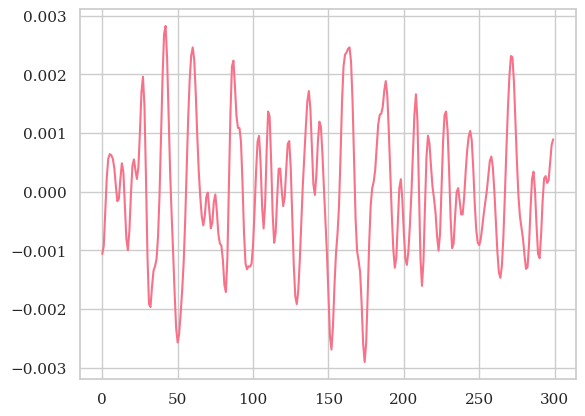

In [ ]:


### Hyperparameter
epochs = 50
batch_size = 64
f = 5
fs = 1000
kf = KFold(n_splits=f,shuffle = True)
accuracies = []
window = 300
F_l = 4
F_h = 100
ica = FastICA(n_components=8,
         random_state=0,
         whiten='unit-variance')

num_trgs = 50
'''

paradigm = SSVEP()

dataset  = moabb.datasets.Lee2019_SSVEP()
print(dataset.paradigm)

n_subject = 54

data = dataset.subject_list[:n_subject]


for i in range(54,len(data)+1): #
# if i == 4:
    #  continue  # Skip the calculation for i=4
 X, freq, _ = paradigm.get_data(dataset=dataset, subjects=[i])
 X = X[0:100]
 freq = freq[0:100]
 X = subsetEEG(X) #extracting_epoch(X)
 #freq = extracting_epoch(freq)
 X_p = data_process(X,F_l,F_h,fs)
 X_ic = []
 for r in range(X.shape[0]):
  X_ic.append(ica.fit_transform(X_p[r,:,:].T).T)
 X_ic = np.array(X_ic)
 X_trials = finding_target_MAMEM1(X_ic,freq) #finding_target_Nakanishi(X_p,num_trgs)
 X_trgs,weight = train_trca(X_trials,int(fs/4))
 X_final = multiplication(X_trgs,weight)

 #X_c = find_CCA(X_p,freq)
 for k in range(int(X_final.shape[-1]/window)+1): # int(X.shape[-1]/window)+3 for Nakanishi
  x = X_final[:,:,int(k*(window)/2):int((k)*(window)/2 + window)]
  if k ==0:
    signal = x
  else:
    signal = np.concatenate((signal,x),axis = 0)
 label = np.zeros((signal.shape[0],len(data)))
 label[:,i-1]=1
 if i==54:
  F_signal = signal
  F_label = label
 else:
  F_signal = np.concatenate((F_signal,signal),axis = 0)
  F_label = np.concatenate((F_label,label),axis = 0)
 with open('//content/drive/MyDrive/Data/signal_ica54', 'wb') as fp:
    pickle.dump(F_signal, fp)
 print(F_signal.shape)
'''

paradigm = SSVEP()

dataset  = moabb.datasets.Lee2019_SSVEP()
print(dataset.paradigm)

n_subject = 54

data = dataset.subject_list[:n_subject]

with open('/content/drive/MyDrive/Data/GCN_Khodam_Signal','rb') as f:
  x1 = pickle.load(f)

with open('/content/drive/MyDrive/Data/GCN_Khodam_Signal14','rb') as f:
  x2 = pickle.load(f)

#with open('/content/drive/MyDrive/Data/GCN_Khodam_Adj','rb') as f:
 # adj = pickle.load(f)

#with open('/content/drive/MyDrive/Data/GCN_Khodam_Adj14','rb') as f:
 # adj1 = pickle.load(f)

#with open('/content/drive/MyDrive/Data/GCN_Khodam_AdjCorr','rb') as f:
 # F_Adj = pickle.load(f)

with open('//content/drive/MyDrive/Data/GCN_Khodam_Adj_RHO', 'rb') as f:
   F_Adj =  pickle.load(f)

F_signal = np.concatenate((x1,x2),axis = 0)
#F_Adj = np.concatenate((adj,adj1),axis = 0)

for i in range(1,len(data)+1):
  label = np.zeros((16,len(data)))
  label[:,i-1]=1
  if i==1:
    F_label = label
  else:
    F_label = np.concatenate((F_label,label),axis = 0)

'''
for i in range (F_signal.shape[0]):
  for j in range(F_signal.shape[1]):
    if j==0:
      A = F_signal[i,j,:,:]
    else:
      A = np.concatenate((A,F_signal[i,j,:,:]))
  A = np.expand_dims(A,axis=0)
  if i ==0:
    X_f = A
  else:
    X_f = np.concatenate((X_f,A),axis=0)


F_signal = np.squeeze(X_f)
#F_signal = np.expand_dims(F_signal,axis = -1)
'''
print(F_signal.shape)  #9720x8x300x1 ==>864x9x300x1
print(F_label.shape)   #9720x9
print(F_Adj.shape)

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")



#Changing to Float 32
K.set_floatx('float32')

plt.plot(F_signal[8,2,:])

checkpoint_dir = '/content/drive/MyDrive/Data/Graph/PLI'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint()

Acc = []
Acc_kamel = []
f = 5
pretrained = 0
for k in range(0,epochs):
    if pretrained ==1:
      #model = tf.keras.models.load_model('/content/drive/MyDrive/Data/weights-new-improvement-Graph'+str(k-1)+'.hdf5')
      model.load_weights('/content/drive/MyDrive/Data/weights-Graph-adj-RHO'+str(k-1)+'.hdf5')
      pretrained = 0
      print('Model is loaded')
    if (k)%30==0 and k!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.1)
        print("lr changed to {}".format(lr*.1))
    accuracies = []
    accuracies_kamel = []
    for train_index, test_index in kf.split(F_signal):
      # Split the data into train and test sets based on the fold indices
      X_train, X_test = F_signal[train_index], F_signal[test_index]
      y_train, y_test = F_label[train_index], F_label[test_index]
      Adj_train, Adj_test = F_Adj[train_index], F_Adj[test_index]
      for m in range(500):

          trainin_it=np.empty((batch_size,F_signal.shape[1],window))
          Adj_trainin = np.empty((batch_size,F_signal.shape[1],F_signal.shape[1]))
          trainout_it=np.empty((batch_size,len(data))) # len(subject_path)
          bac = 0  # Initialize the batch index

          for bac in range(batch_size):

              rand_l=np.random.randint(X_train.shape[0])


              trainin_it[bac,:,:]= X_train[rand_l,:,:]
              trainout_it[bac,:]= y_train[rand_l,:]
              Adj_trainin[bac,:,:]= Adj_train[rand_l,:,:]

          #trainin_it = tf.transpose(trainin_it,(0,2,1))


          model.fit([trainin_it,Adj_trainin] ,trainout_it,
                    batch_size=batch_size,
                    epochs=1,
                    verbose=1)
      trainin_it = []
      trainout_it = []
      Adj_trainin = []

      #### Validation

      trainin_val=np.empty((batch_size,F_signal.shape[1],window))
      Adj_trainin_val = np.empty((batch_size,F_signal.shape[1],F_signal.shape[1]))
      trainout_val=np.empty((batch_size,len(data))) #  len(subject_path)
      correct = 0
      total = 0
      for bac in range(batch_size): #for bac in range(len(X_test)):

          rand_l=np.random.randint(X_test.shape[0])


          trainin_val[bac,:,:]= X_test[rand_l,:,:]
          Adj_trainin_val[bac,:,:] = Adj_test[rand_l,:,:]
          trainout_val[bac,:]= y_test[rand_l,:]

      #trainin_val = tf.transpose(trainin_val,(0,2,1))

      Prediction = model.predict([trainin_val,Adj_trainin_val])
      for i in range(len(Prediction)):
        if np.max(Prediction[i])< 0.5:
          act_label = numpy.argmax(trainout_val[i]) # act_label = 1 (index)
          pred_label = numpy.argmax(Prediction[i]) # pred_label = 1 (index)
          if(act_label == pred_label):
              correct += 1
          total += 1
      if total == 0:
        total = 1
      accuracy = (correct/total)
      accuracies.append(accuracy)

      # Kamel
      correct_kamel = 0
      total_kamel = 0
      for i in range(len(Prediction)):
            act_label = numpy.argmax(trainout_val[i]) # act_label = 1 (index)
            pred_label = numpy.argmax(Prediction[i]) # pred_label = 1 (index)
            if(act_label == pred_label):
                correct_kamel += 1
            total_kamel += 1
      accuracy = (correct_kamel/total_kamel)
      accuracies_kamel.append(accuracy)
      # Calculate the average accuracy across all folds
    average_accuracy = sum(accuracies) / f
    Acc.append(average_accuracy)

      # Calculate the average accuracy across all folds
    average_accuracy_kamel = sum(accuracies_kamel) / f
    Acc_kamel.append(average_accuracy_kamel)
    print('Average Acuuracy over %d fold is %.2f'%(f,average_accuracy))
    print('Average Acuuracy without Threshold over %d fold is %.2f'%(f,average_accuracy_kamel))
    with open('//content/drive/MyDrive/Data/Avg_acc', 'wb') as fp:
      pickle.dump(Acc, fp)
    with open('//content/drive/MyDrive/Data/Avg_acc_kamel', 'wb') as fp:
      pickle.dump(Acc_kamel, fp)
    #model.save('/content/drive/MyDrive/Data/weights-Graph-adjj'+str(k)+'.hdf5')
    model.save_weights('/content/drive/MyDrive/Data/weights-Graph-adj-RHO'+str(k)+'.hdf5')
    print('Model is saved')

    print("The epoch is",k+1)

#with open('/content/drive/MyDrive/Data/Avg_acc','rb') as f:
  #x = pickle.load(f)


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open('/content/drive/MyDrive/Data/Avg_acc_kamel','rb') as f:
  x = pickle.load(f)

#a = [0.65625, 0.725, 0.765625]
#b = [0.7875, 0.76875, 0.846875, 0.840625, 0.834375, 0.828125]
#c = [0.815625, 0.9, 0.896875, 0.878125, 0.903125]
#d = a + b + c

### EEGNet after 14 Epochs accuracy 82%
### CNN after 5 Epochs accuracy 90%
### CNN+LSTM = [0.203125] [0.371875, 0.26875, 0.30625, 0.415625, 0.3875, 0.440625] [0.490625] [0.4125, 0.4125, 0.490625, 0.45, 0.48125, 0.56875, 0.534375, 0.61875, 0.521875]
#[0.528125] #[0.646875, 0.5875, 0.70625, 0.575, 0.503125, 0.5875, 0.709375]
# GCN (PLV)[0.0875,0.14375,0.296875,0.425,0.53125,0.559375,0.75625,0.834375,0.9,0.85,0.93125,0.94375,0.940625]
# GCN(Cor)[0.3875,0.63125,0.75625,0.79375,0.928125,0.9375,0.93125,0.971875,0.96875,0.91875,0.990625]
#GCN(PLI) [0.296875,0.425,0.53125,0.559375,0.75625,0.834375,0.9,0.85,0.93125,0.94375,0.940625]
np.mean(x)

0.9093749999999999

In [ ]:
import os.path as osp
import numpy as np
import math
from scipy import special

alf = {
  'path': {
    'pretrain_model_G': 'C:/Users/Morteza/Morteza P/DAN-master/DAN-master/codes/config/DANv2',
   # 'strict_load': True,
    'resume_state': 'C:/Users/Morteza/Morteza P/DAN-master/DAN-master/codes'  # Assuming it's not specified in the YAML
  }
}

# Expand user directories in the paths
for key, path in alf['path'].items():
     alf['path'][key] = osp.expanduser(path)
     #print(key)
     #print(alf['path'][key])
alf["path"]["root"] = osp.abspath(
        osp.join( osp.pardir, osp.pardir, osp.pardir, osp.pardir)
    )
path = 'c:/Users/Morteza/Morteza P/DAN-master/DAN-master/codes/config/DANv2/options.py'
path.split("/")[8]
import os.path


# Path
path = "~/file.txt"

# Expand an initial ~ component
# in the given path
# using os.path.expanduser() method

import torch
out = torch.rand(8,3,10,10)

jpeg_range =  [30, 95]
jpeg_p = out.new_zeros(out.size(0)).uniform_(*jpeg_range)
def quality_to_factor(quality):
    """ Calculate factor corresponding to quality

    Args:
        quality(float): Quality for jpeg compression.

    Returns:
        float: Compression factor.
    """
    if quality < 50:
        quality = 5000. / quality
    else:
        quality = 200. - quality * 2
    return quality / 100.
matrix = np.array([[0.299, 0.587, 0.114], [-0.168736, -0.331264, 0.5], [0.5, -0.418688, -0.081312]],
                          dtype=np.float32).T
hs = [1,2,3,4,5]
hs.pop()
print(hs)

[1, 2, 3, 4]


### Akharin Version Train Verification

In [ ]:

subject_path = ['/content/drive/MyDrive/Data/subj1_July31_cca.mat','/content/drive/MyDrive/Data/subj2_July31_cca.mat','/content/drive/MyDrive/Data/subj12_July31_cca.mat']
### Hyperparameter
epochs = 35
batch_size = 64
f = 5
kf = StratifiedKFold(n_splits=f,shuffle = True)
accuracies = []


for i in range(len(subject_path)):
  a = scipy.io.loadmat(subject_path[i])['Sig']
  signal = []
  for ke in range(a.shape[-1]):
    signal.append(a[:,:,ke])
  signal = np.array(signal)
  signal = np.transpose(signal,(0,2,1))
  signal = np.expand_dims(signal,axis=-1)
  label = np.zeros((signal.shape[0],len(subject_path)))
  if i==0:
    F_signal = signal
    label[:,i]=1
    F_label = label
  else:
    F_signal=np.concatenate((F_signal,signal),axis=0)
    if i==1:
     label[:,i]=1
     F_label=np.concatenate((F_label,label),axis=0)
    if i==2:
     label[:,i]=1
     F_label=np.concatenate((F_label,label),axis=0)


print(F_signal.shape) #288x3x256x1,,,234x3x312x1
print(F_label.shape) #288x3,,, 234x3

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipvalue=0.1),

              metrics=['mse'])

Acc = []
pretrained = 1

s = 0 # Class zero
binary_labels = np.argmax(F_label, axis=1)  # This will give you the index of the positive class (0, 1, or 2)
positive_class_index = s
binary_labels = np.where(binary_labels == positive_class_index, 1, 0)
print(binary_labels)

for k in range(10,epochs):
    if pretrained ==1:
      model = tf.keras.models.load_model('/content/drive/MyDrive/Data/weights-new-improvement-Verification-'+str(k-1)+'.hdf5')
      pretrained = 0
      print('Model is loaded')
    if (k)%20==0 and k!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.1)
        print("lr changed to {}".format(lr*.1))
    accuracies = []

      #binary_labels_ = np.argmax(y_test, axis=1)  # This will give you the index of the positive class (0, 1, or 2)
      #binary_labels_test = np.where(binary_labels_ == positive_class_index, 1, 0)
    for train_index, test_index in kf.split(F_signal,binary_labels):
      # Split the data into train and test sets based on the fold indices
      X_train, X_test = F_signal[train_index], F_signal[test_index]
      binary_labels_train, binary_labels_test = binary_labels[train_index], binary_labels[test_index]

      for m in range(750):

          trainin_it=np.empty((batch_size,8,312,1))
          trainout_it=np.empty((batch_size,1))

          for bac in range(batch_size):

              rand_l=np.random.randint(X_train.shape[0])


              trainin_it[bac,:,:,0]= X_train[rand_l,:,:,0]
              trainout_it[bac,:]= binary_labels_train[rand_l]

          model.fit(trainin_it, trainout_it,
                    batch_size=batch_size,
                    epochs=1,
                    verbose=1)
      trainin_it=[]
      trainout_it=[]


      #### Validation

      trainin_val=np.empty((len(X_test),8,312,1))
      trainout_val=np.empty((len(X_test),1))
      correct = 0
      total = 0
      for bac in range(len(X_test)):

          rand_l=np.random.randint(X_test.shape[0])


          trainin_val[bac,:,:,0]= X_test[rand_l,:,:,0]
          trainout_val[bac,:]= binary_labels_test[rand_l]

      Prediction = model.predict(trainin_val)
      predicted_categories = np.where(Prediction > 0.5, 1, 0)
      for i in range(len(predicted_categories)):
          if(predicted_categories[i] == trainout_val[i]):
            correct +=1
          total += 1
      accuracy = (correct/total)
      accuracies.append(accuracy)

    # Calculate the average accuracy across all folds
    average_accuracy = sum(accuracies) / (f*(s+1))
    Acc.append(average_accuracy)
    print('Average Acuuracy over %d fold and %d person is %.2f'%(f,(s+1),average_accuracy))
    with open('/content/drive/MyDrive/Data/Avg_verific_acc', 'wb') as fp:
      pickle.dump(Acc, fp)
    model.save('/content/drive/MyDrive/Data/weights-new-improvement-Verification-'+str(k)+'.hdf5')
    print('Model is saved')

    print("The epoch is",k+1)

#with open('/content/drive/MyDrive/Data/Avg_verific_acc','rb') as f:
 # x = pickle.load(f)


In [ ]:


with open('/content/drive/MyDrive/Data/Avg_verific_acc','rb') as f:
  x = pickle.load(f)
x


[0.8461609620721553,
 0.8246993524514338,
 0.8035152636447733,
 0.893154486586494,
 0.8506012950971323,
 0.8246993524514338,
 0.8506012950971321]

In [ ]:
yt = trainout_it[1]
yp = pred[1]
(yt == yp).any()

False

### Preparing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
subject_path = ['/content/drive/MyDrive/Data/Dataset_Epilepsy/BCI/Train_tebghe_Ali/version_5_July/Subj1_final_19_02_16.mat','/content/drive/MyDrive/Data/Dataset_Epilepsy/BCI/Train_tebghe_Ali/version_5_July/Subj2_final_17_36_23.mat','/content/drive/MyDrive/Data/Dataset_Epilepsy/BCI/Train_tebghe_Ali/version_5_July/Subj12_final_20_41_35.mat']

for i in range(len(subject_path)):
  signal = scipy.io.loadmat(subject_path[i])['final_signal']
  signal = signal.reshape(signal.shape[-1],signal.shape[0],signal.shape[1])
  signal = np.expand_dims(signal,axis=-1)
  label = np.zeros((signal.shape[0],len(subject_path)))
  if i==0:
    F_signal = signal
    label[:,i]=1
    F_label = label
  else:
    F_signal=np.concatenate((F_signal,signal),axis=0)
    if i==1:
     label[:,i]=1
     F_label=np.concatenate((F_label,label),axis=0)
    if i==2:
     label[:,i]=1
     F_label=np.concatenate((F_label,label),axis=0)

F_signal = np.array(F_signal) #390x24x312x1
print(F_signal.shape)

print(F_label.shape)


(390, 24, 312, 1)
(390, 3)


In [ ]:
with gzip.open('/content/drive/MyDrive/Data/Dataset_Epilepsy/Subject1/record-[2012.07.06-19.02.16].pz', 'rb') as f:
    o = pickle.load(f, encoding='latin1')

#raw_signal = o['raw_signal'].T
raw_signal = scipy.io.loadmat('/content/drive/MyDrive/Data/Dataset_Epilepsy/Subject1/Subj1_19_02_16.mat')['data']
event_pos = o['event_pos'].reshape((o['event_pos'].shape[0]))
event_type = o['event_type'].reshape((o['event_type'].shape[0]))
sfreq = 256
classes = ['Resting', '13Hz', '21Hz', '17Hz']
channels = array(['Oz','O1','O2','PO3','POz','PO7','PO8','PO4'])
raw_signal.shape

(8, 57024)

In [ ]:
labels = list()
for e in event_type:
    if e == 33024: labels.append('Resting')
    elif e == 33025: labels.append('13Hz')
    elif e == 33026: labels.append('21Hz')
    elif e == 33027: labels.append('17Hz')
labels = array(labels)
labels

array(['Resting', 'Resting', 'Resting', 'Resting', 'Resting', 'Resting',
       'Resting', 'Resting', '21Hz', '17Hz', '13Hz', '21Hz', '13Hz',
       '17Hz', '13Hz', '21Hz', '17Hz', '21Hz', '17Hz', '13Hz', '17Hz',
       '13Hz', '21Hz', '17Hz', '13Hz', '21Hz', '13Hz', '17Hz', '21Hz',
       '17Hz', '21Hz', '13Hz'], dtype='<U7')

In [ ]:
def butter_bandpass(signal, lowcut, highcut, fs, order=4, filttype='forward-backward'):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    if filttype == 'forward':
        filtered = lfilter(b, a, signal, axis=-1)
    elif filttype == 'forward-backward':
        filtered = filtfilt(b, a, signal, axis=-1)
    else:
        raise ValueError("Unknown filttype:", filttype)
    return filtered

In [ ]:
frequencies = [13., 17., 21.]
freq_band = 0.1
ext_signal = empty_like(raw_signal[0,:])

for f in frequencies:
    ext_signal = vstack((ext_signal, butter_bandpass(raw_signal, lowcut=f-freq_band,
                                                     highcut=f+freq_band, fs=sfreq)))
ext_signal = ext_signal[1:,:]
ext_signal.shape

(24, 57024)

In [ ]:
ext_trials = list()

for e, t in zip(event_type, event_pos):
    if e == 32779: # start of a trial
        start = t + 2*sfreq
        stop = t + 5*sfreq
        ext_trials.append(ext_signal[:, start:stop])
ext_trials = array(ext_trials)
ext_trials = ext_trials - tile(ext_trials.mean(axis=2).reshape(ext_trials.shape[0],
                            ext_trials.shape[1], 1), (1, 1, ext_trials.shape[2]))

#scipy.io.savemat('/content/drive/MyDrive/Data/Dataset_Epilepsy/sal.mat', mdict={'whatever_data': ext_trials})

#with open('/content/drive/MyDrive/Data/Dataset_Epilepsy/BCI/Subj12_19_47_49', 'wb') as fp:
   # pickle.dump(ext_trials, fp)
ext_trials.shape

(32, 24, 768)

In [ ]:
### Removing the Resting State from data

ext_real = numpy.zeros((ext_trials.shape[0]-8,ext_trials.shape[1],ext_trials.shape[2]))
#ext_real[:4,:,:] = ext_trials[3:7,:,:]
#ext_real[4:8,:,:] = ext_trials[8:12,:,:]
#ext_real[8:12,:,:] = ext_trials[13:17,:,:]
#ext_real[12:16,:,:] = ext_trials[18:22,:,:]
#ext_real[16:20,:,:] = ext_trials[23:27,:,:]
#ext_real[20:,:,:] = ext_trials[28:,:,:]
ext_real[:,:,:] = ext_trials[8:,:,:]

In [ ]:
import numpy as np

ext_reshape = np.zeros((ext_real.shape[1],ext_real.shape[2]))

for i in range (ext_real.shape[0]):
    ext_reshape = np.hstack((ext_reshape, ext_real[i]))
ext_reshape = ext_reshape[:,768:]
print(ext_reshape.shape)
with open('/content/drive/MyDrive/Data/Dataset_Epilepsy/Subject1/Subj1_19_02_16_1', 'wb') as fp:
    pickle.dump(ext_reshape, fp)

(24, 18432)


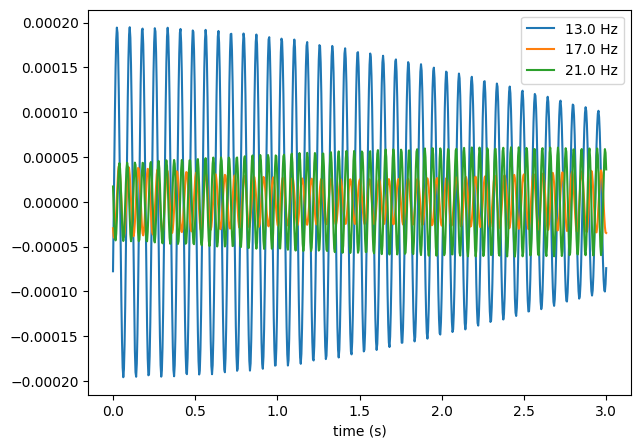

In [ ]:
n_seconds = 3
time = linspace(0, n_seconds, n_seconds * sfreq).reshape((1, n_seconds * sfreq))
plt.figure(figsize=(7, 5))
plt.plot(time.T, ext_real[16, 1, :].T, label=str(frequencies[0])+' Hz')
plt.plot(time.T, ext_real[16, 9, :].T, label=str(frequencies[1])+' Hz')
plt.plot(time.T, ext_real[16, 17, :].T, label=str(frequencies[2])+' Hz')
plt.xlabel("time (s)")
_ = plt.legend(loc='upper right')

### Alireza's training Scheme